## Problem Statement ##

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

In [1]:
#Suppress Warning

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets Import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Increase Pandas view width and height

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [4]:
#Lets read the csv as dataframe 'df'

df = pd.read_csv(r'C:\Users\soura\Desktop\Upgrad\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Lets check the type of daTA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Lets check the statistics of the continuous variable columns

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#Lets check the number of missing values

100*df.isnull().sum()/len(df)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

## EDA

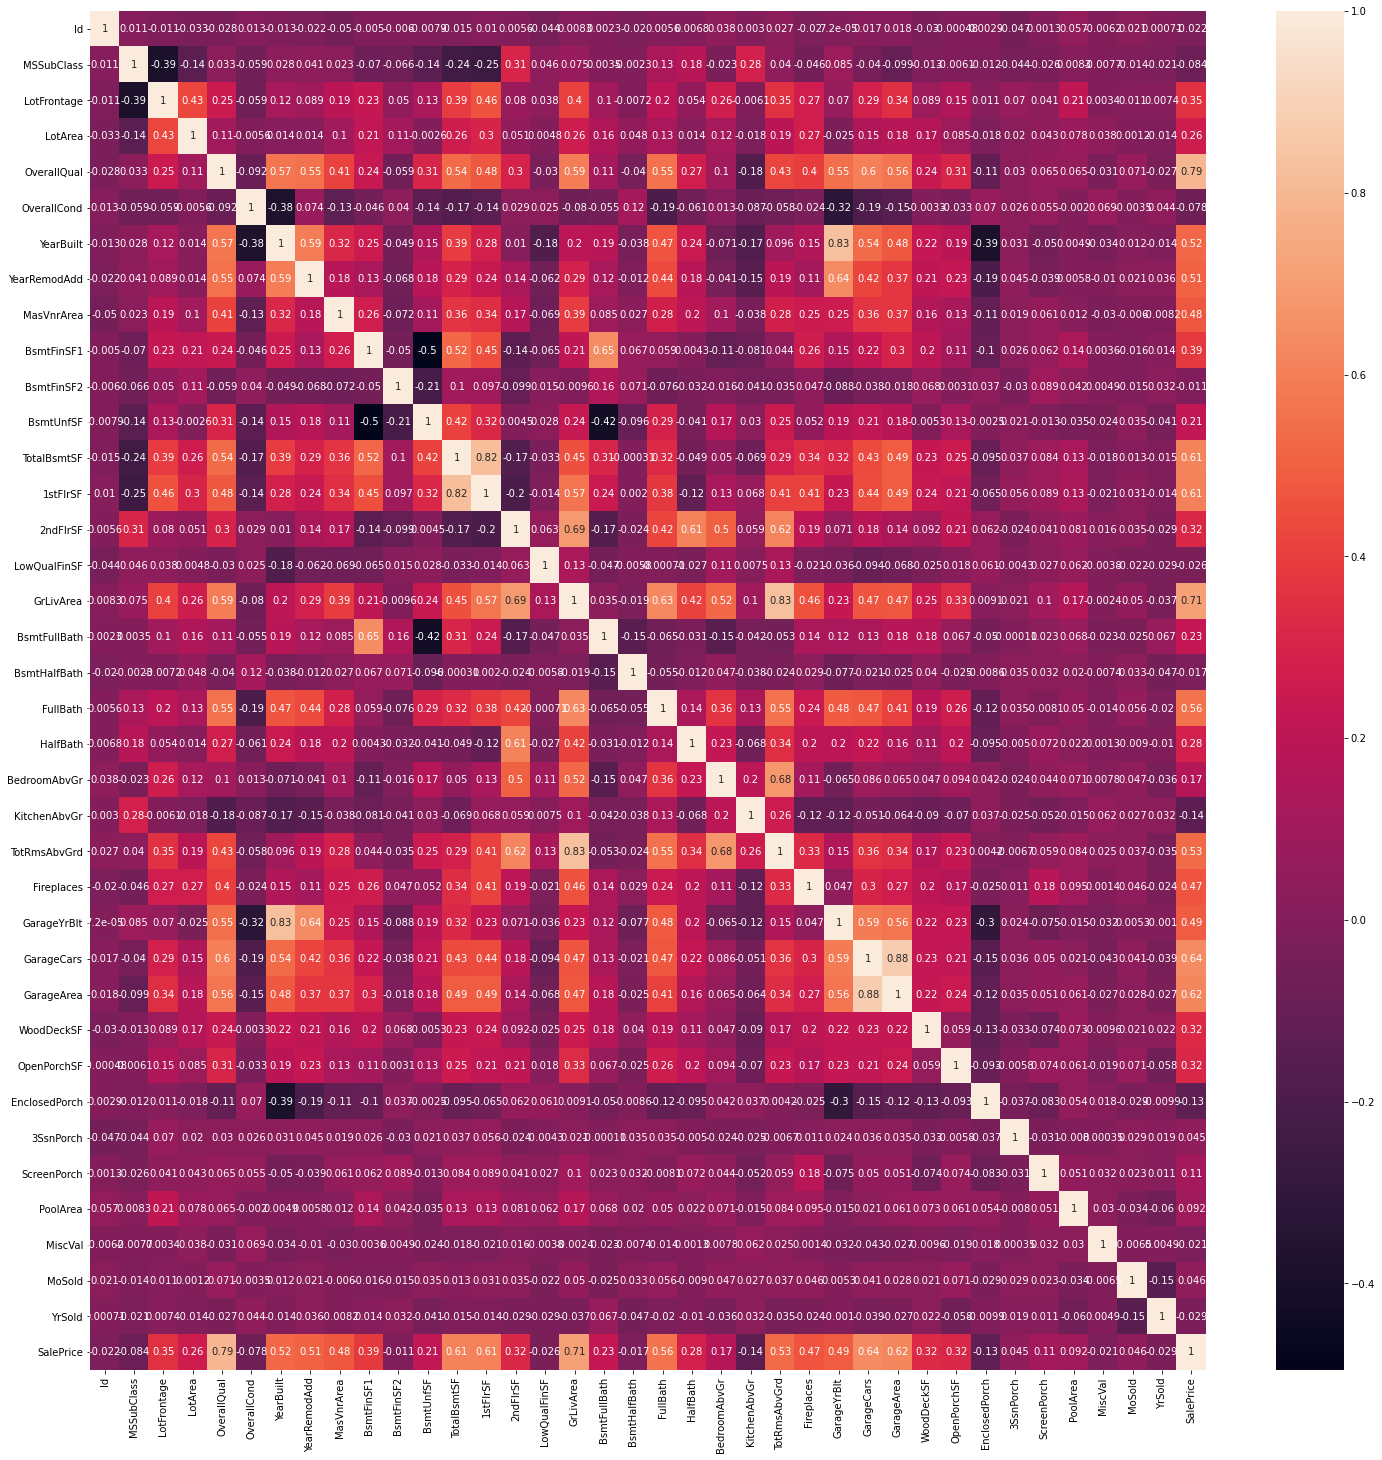

In [8]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

From the heatmap we can see yearbuilt , garage year built have a high correlation, so we can remove one of them.Since we are only dealing with number of years for the house age, we dont need the months column
Same goes with garage area and no. of garage cars.
TotalBasementabvgrd has a high correlation with grdlivarea, we can remove totalbasement since grdliv area is an important factor.Same goes with 2nd floor and kitchen area. Further after dummification, we will identify some more correlations



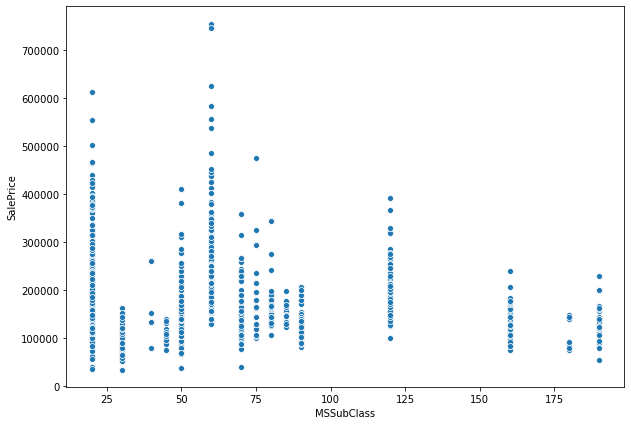

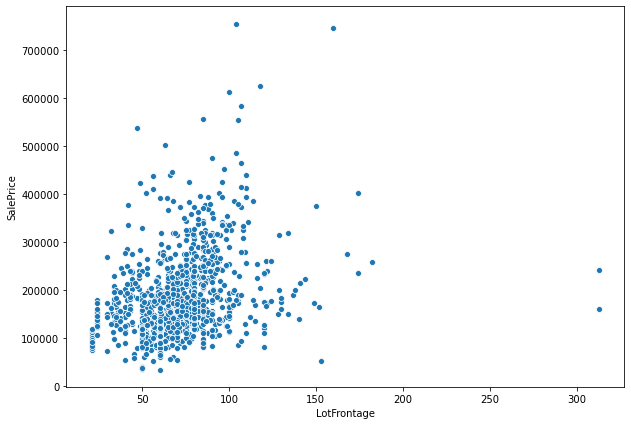

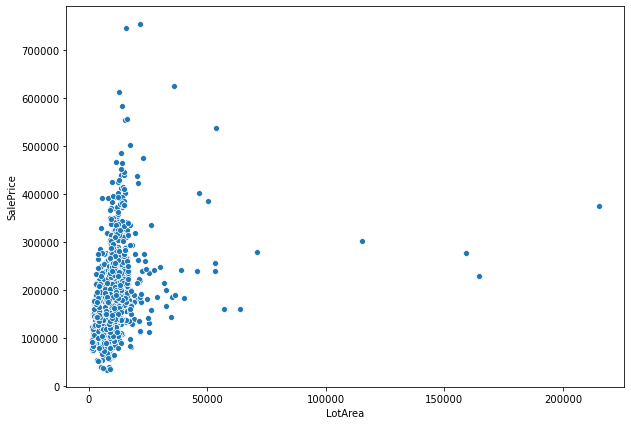

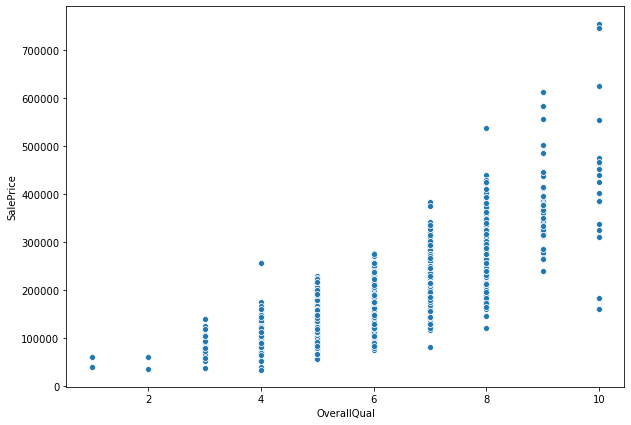

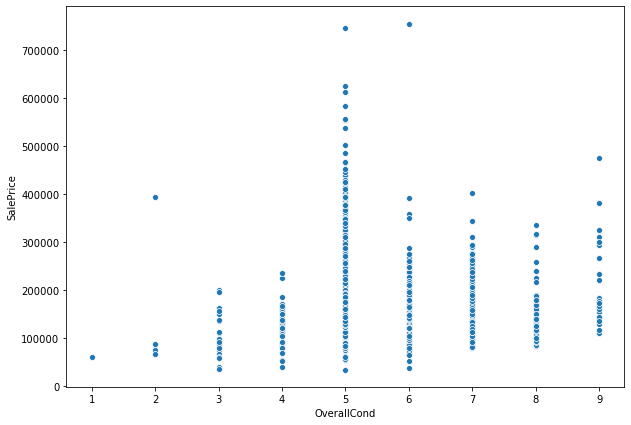

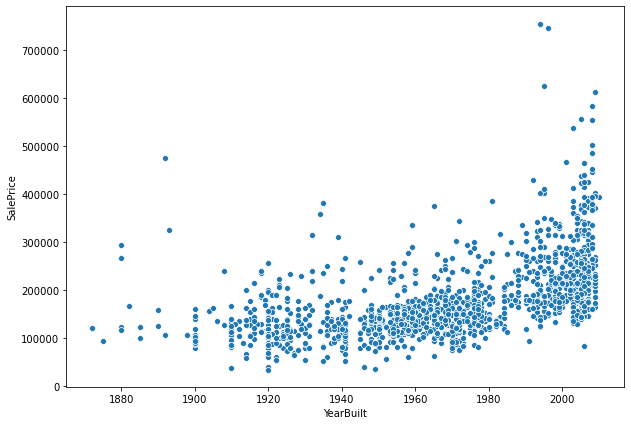

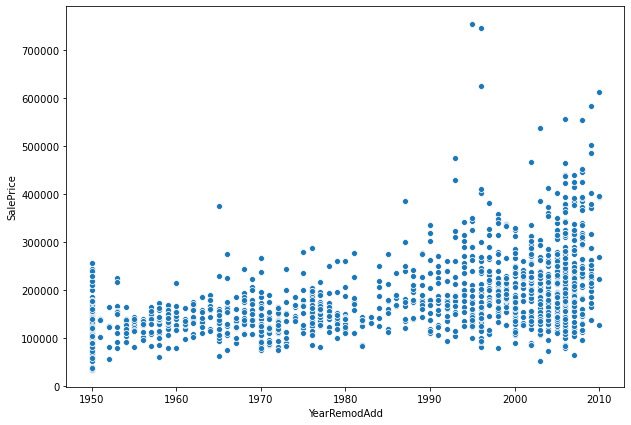

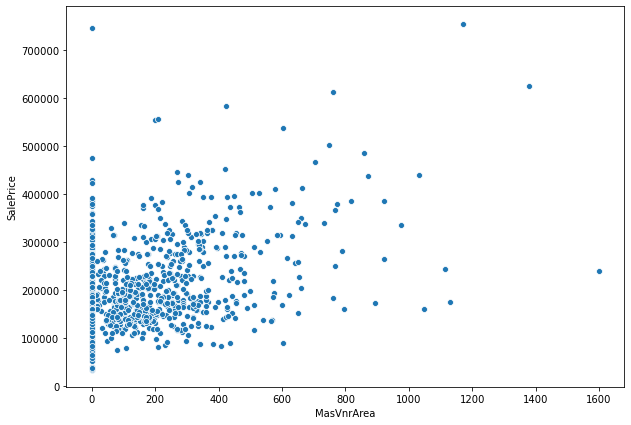

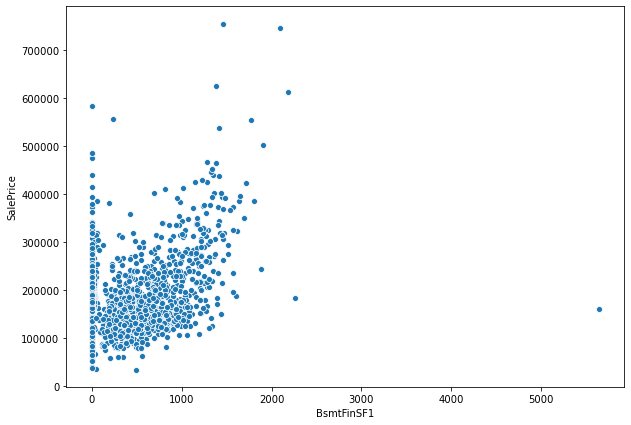

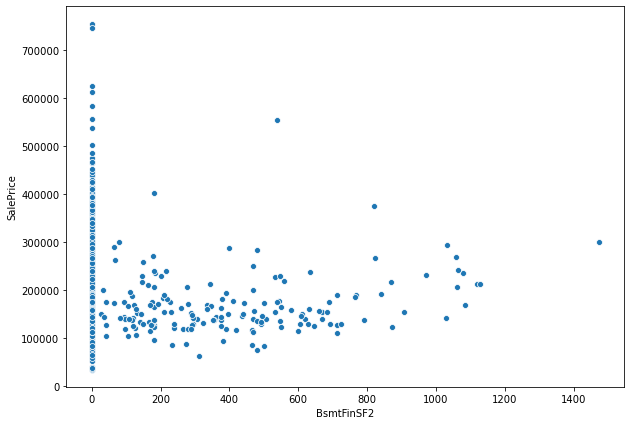

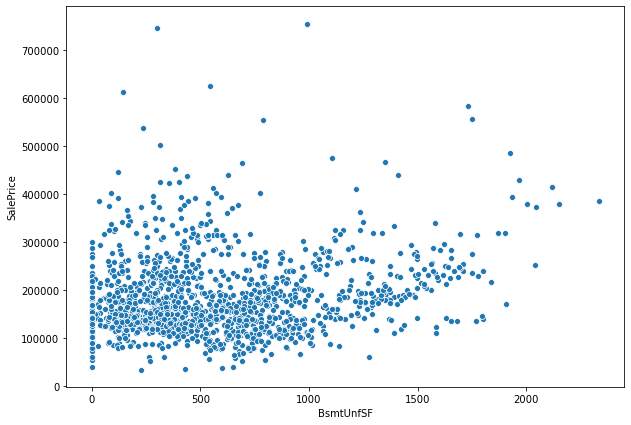

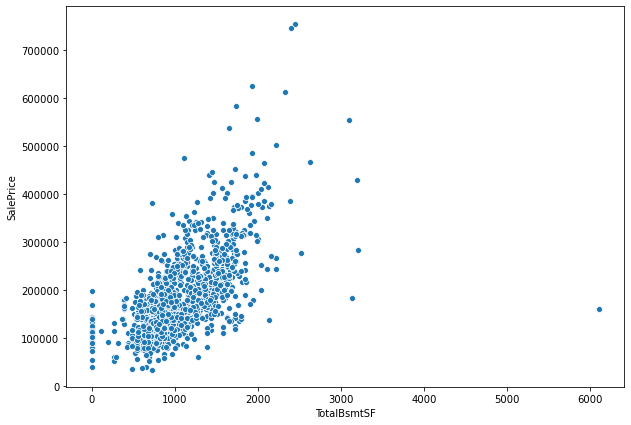

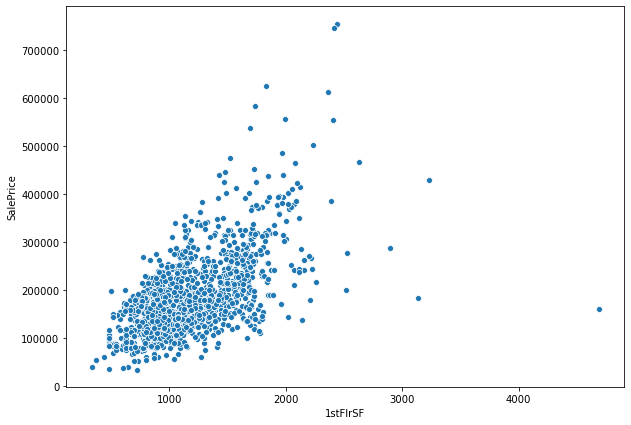

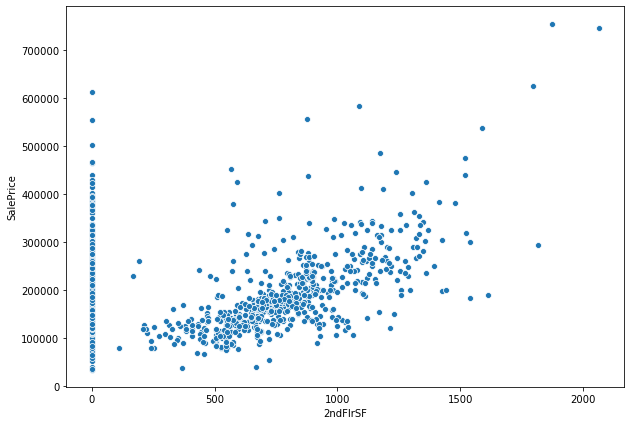

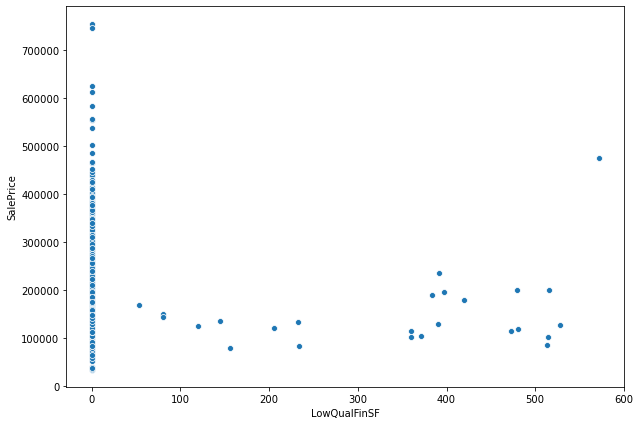

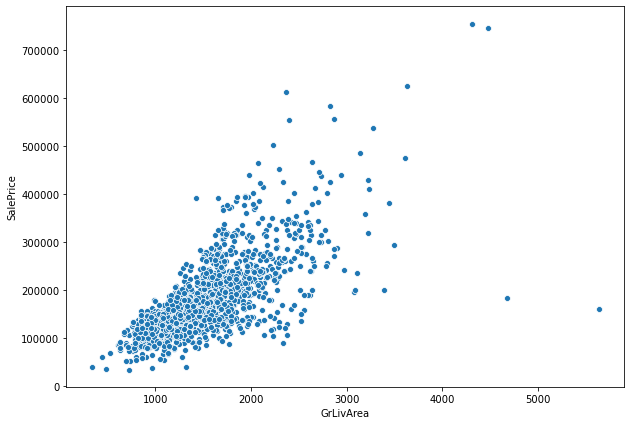

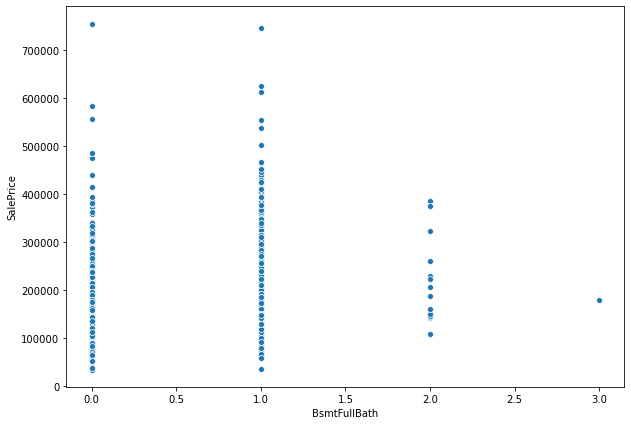

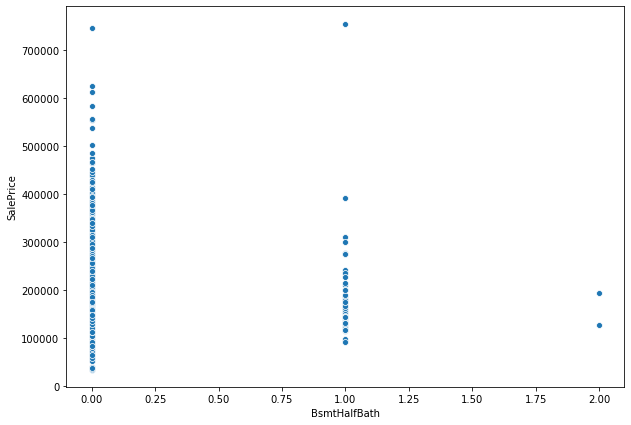

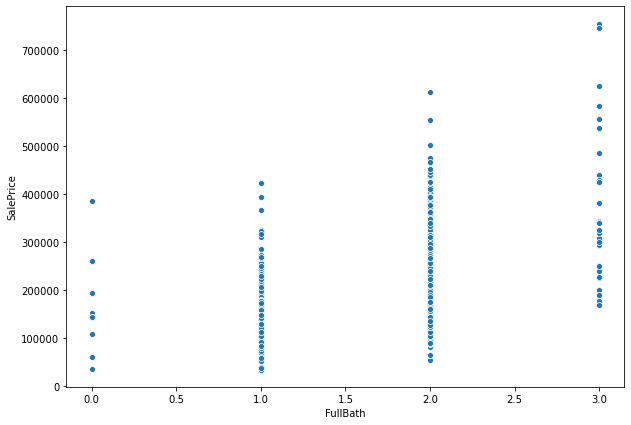

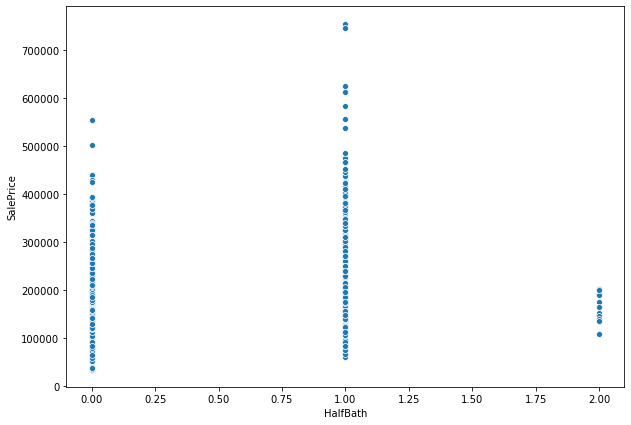

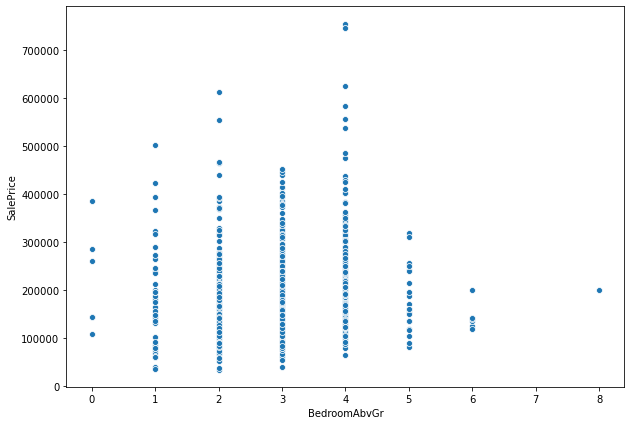

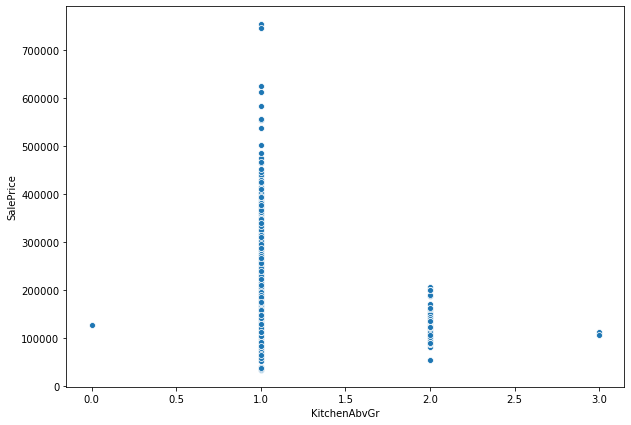

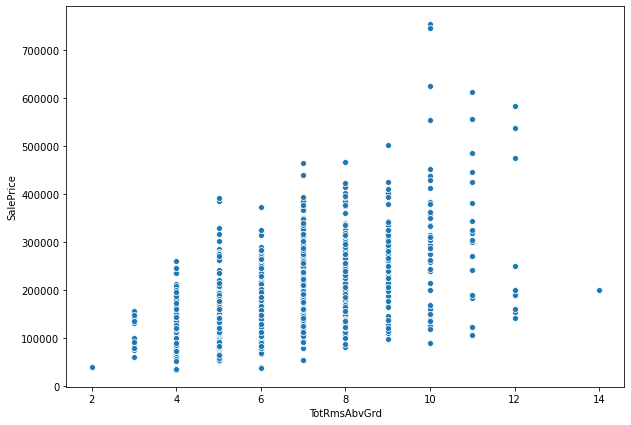

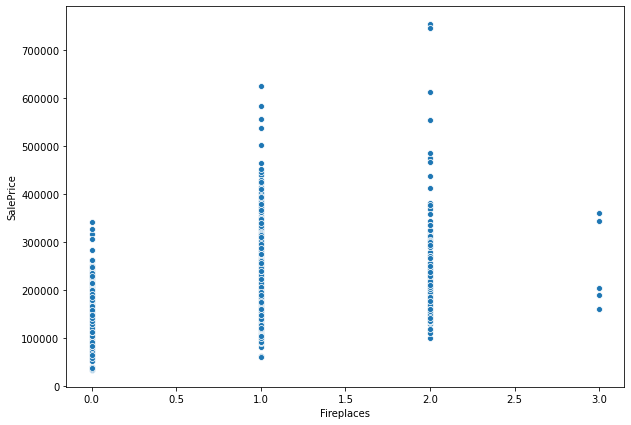

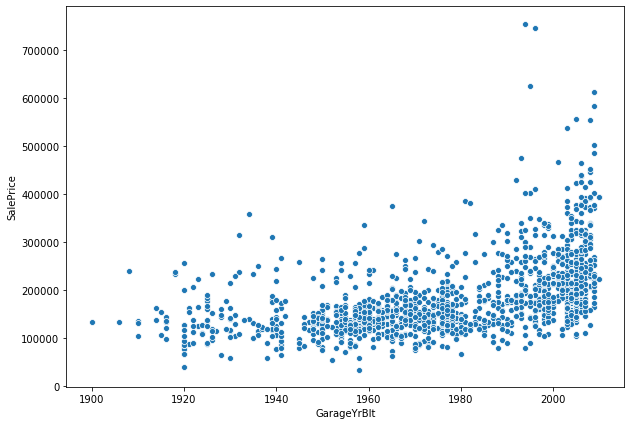

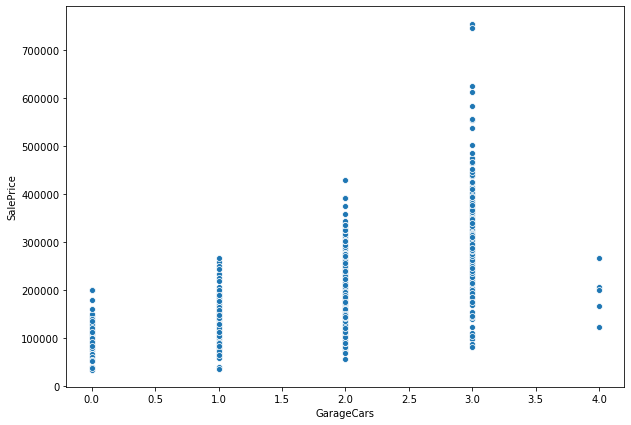

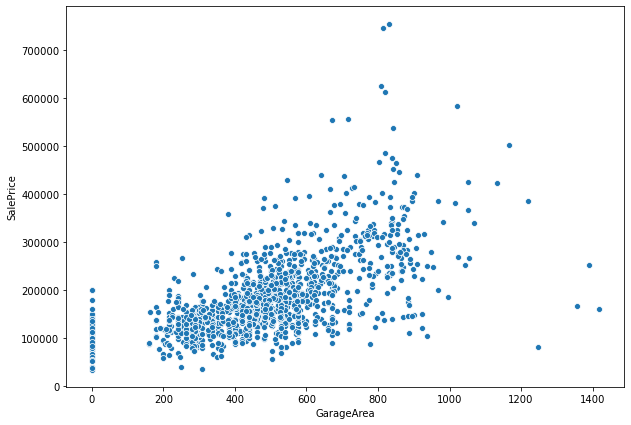

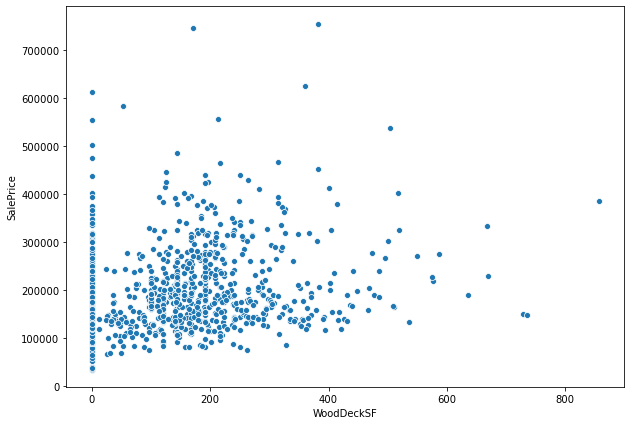

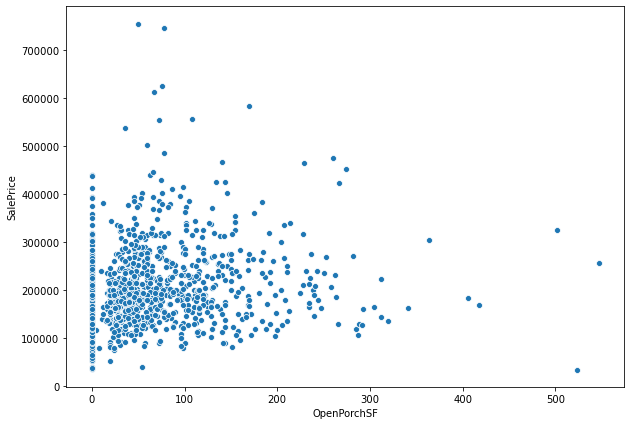

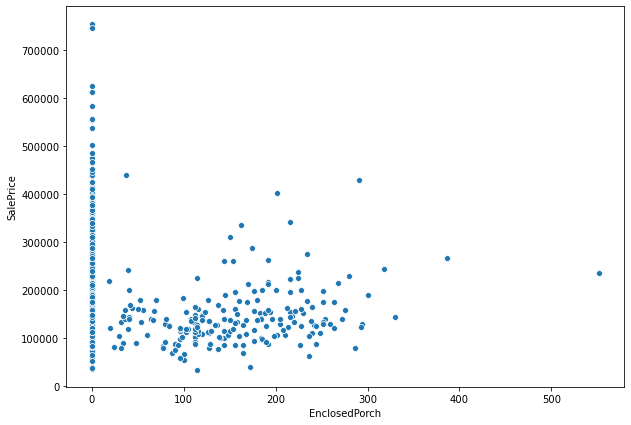

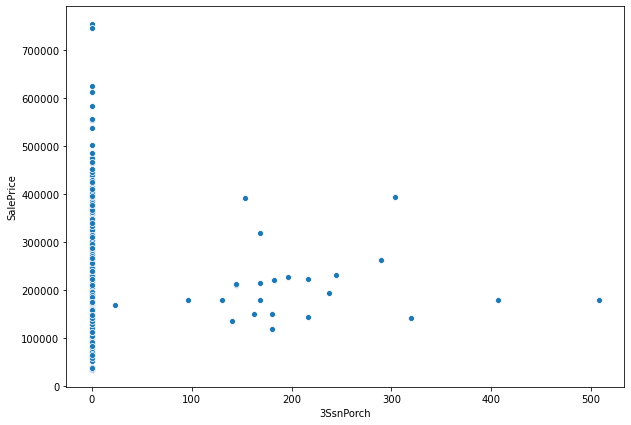

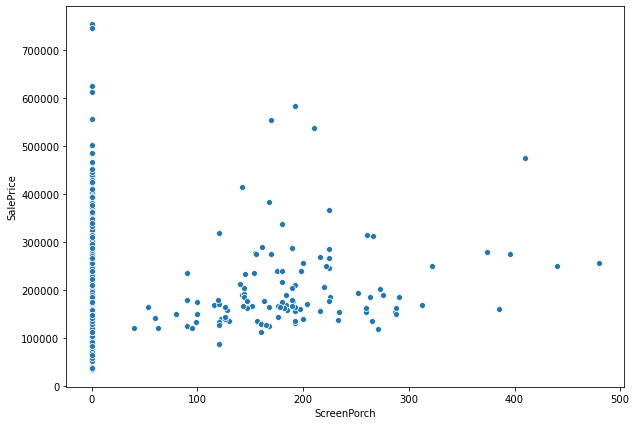

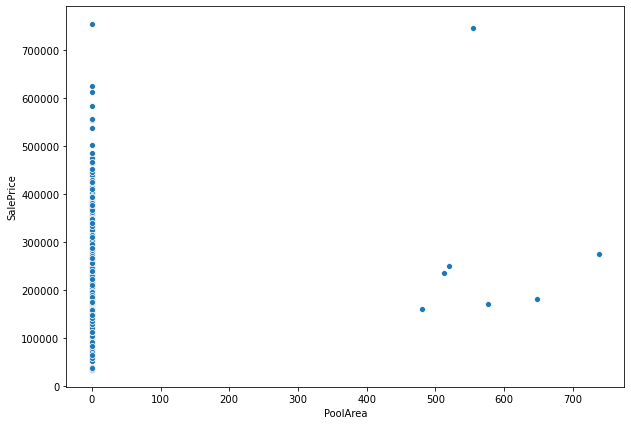

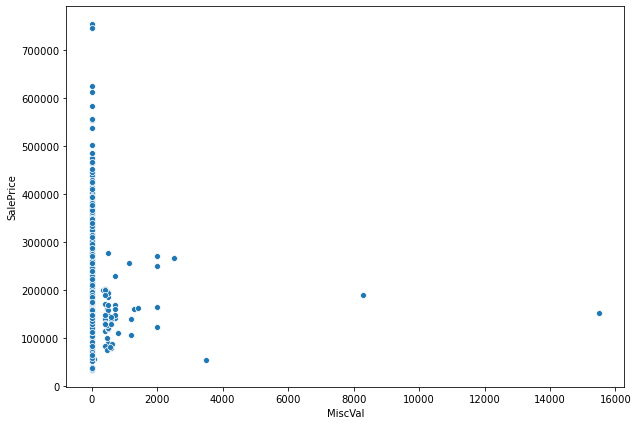

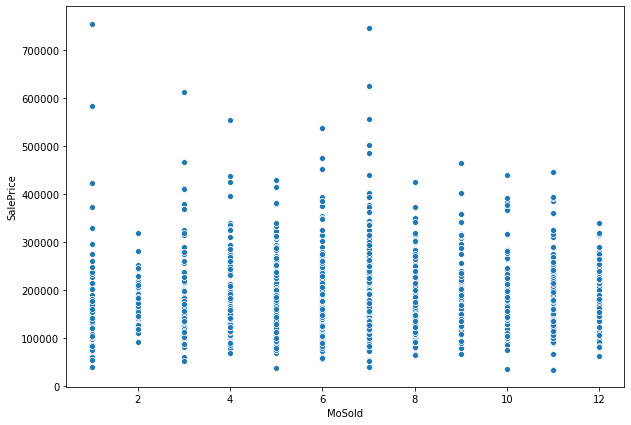

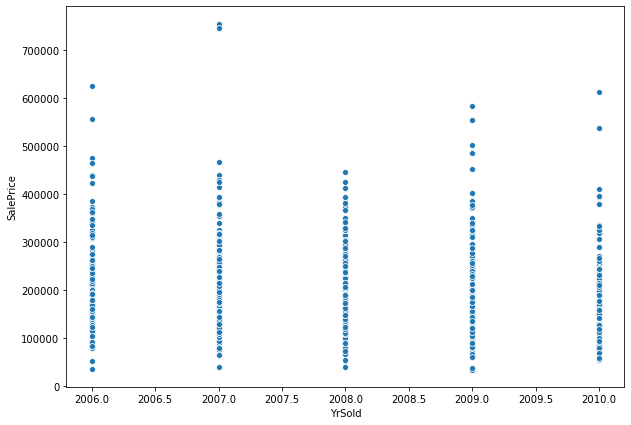

In [9]:
for i in range(2,len(df.select_dtypes(include=['int64','float64']).columns)):
    plt.figure(figsize=(10,7))
    sns.scatterplot(x=df.select_dtypes(include=['int64','float64']).columns[i-1],y='SalePrice',data=df)
    plt.show()

We can see totalbsmtSf, 1stfloorSF, grdlivarea, garagearea, openporchSF, WoodDeckSF, 2ndflrSF have a very high linear relationship with the price of the house

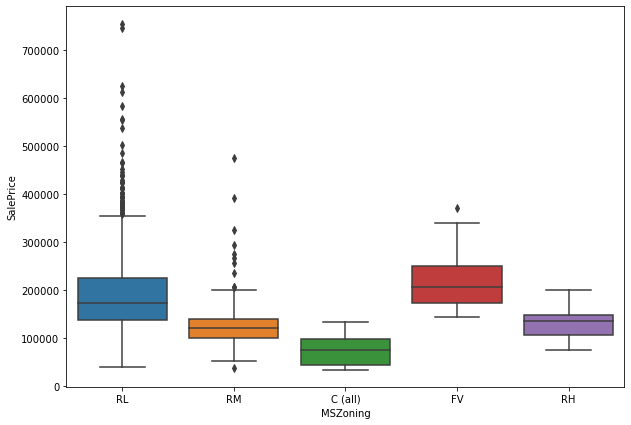

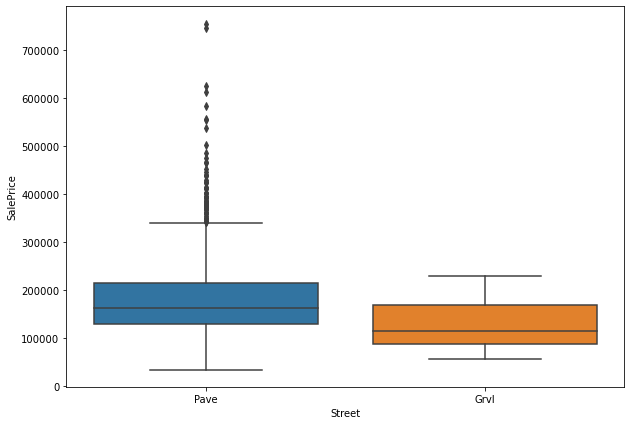

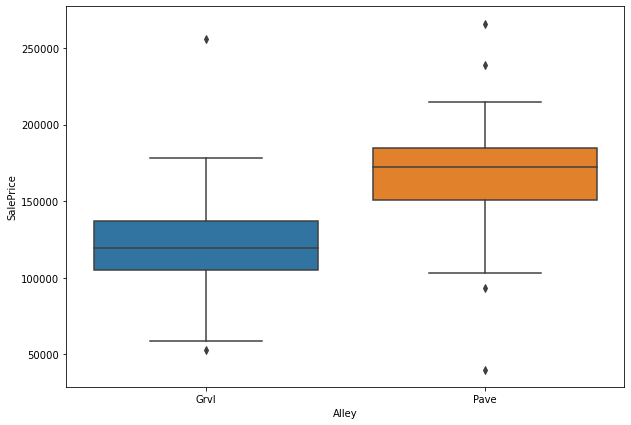

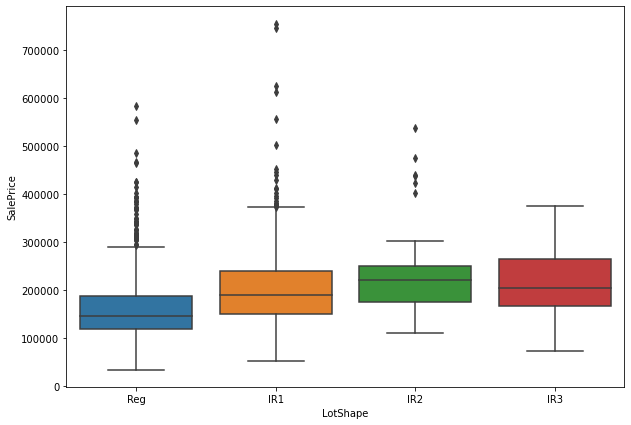

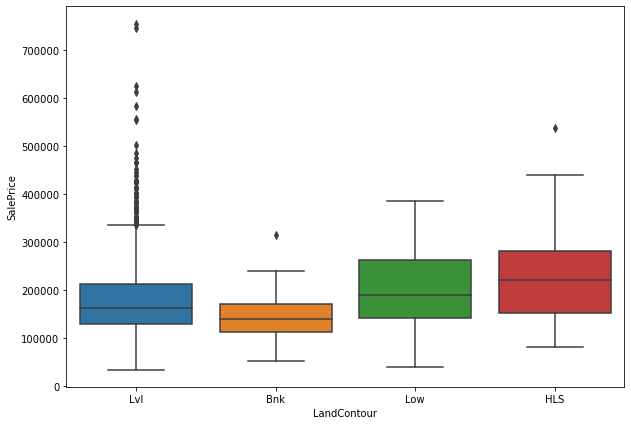

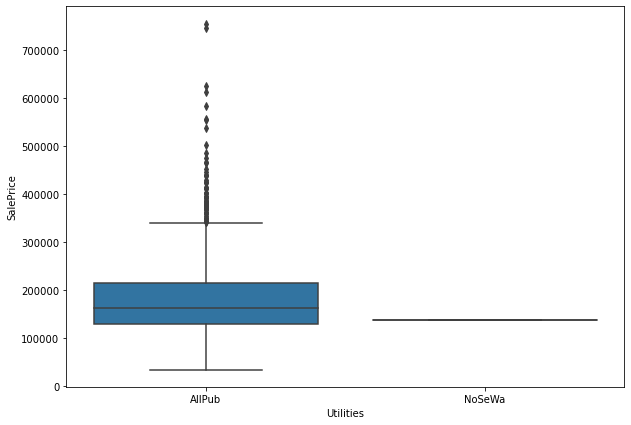

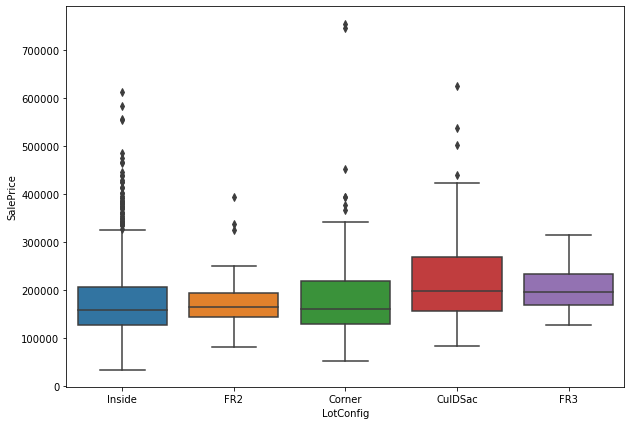

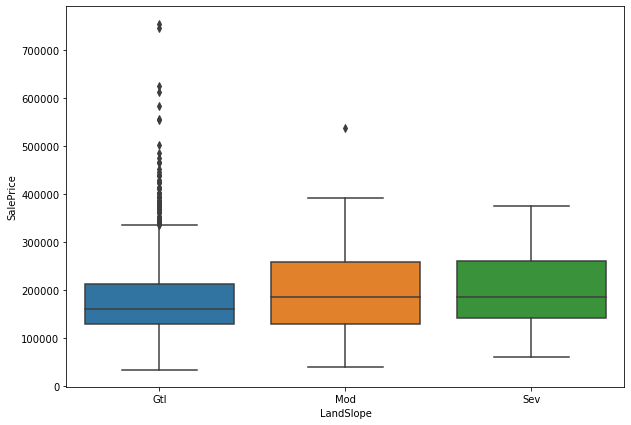

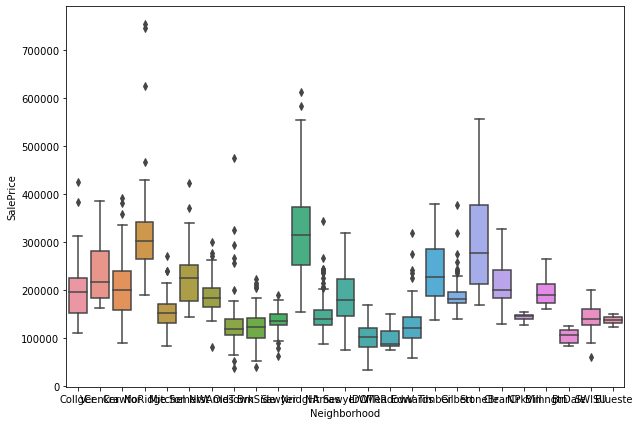

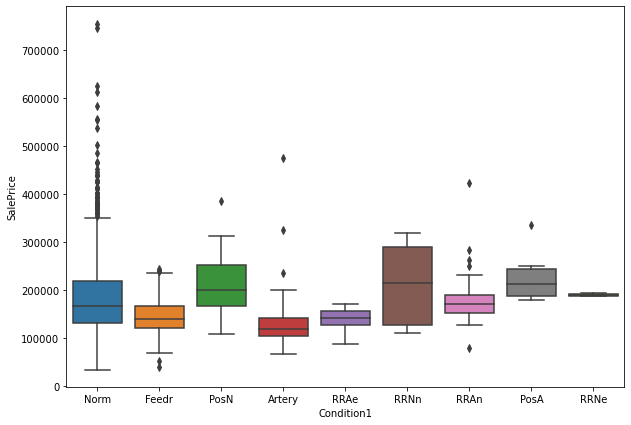

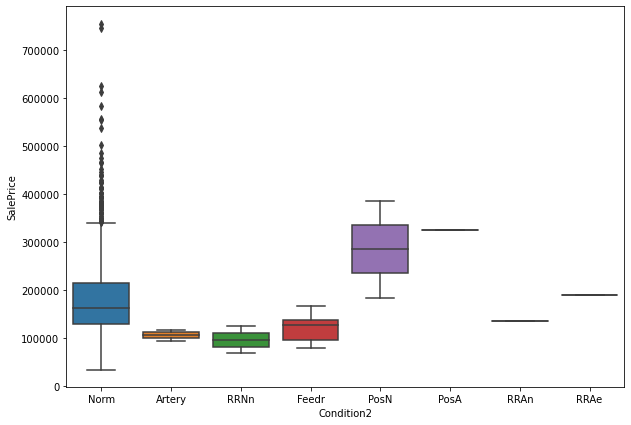

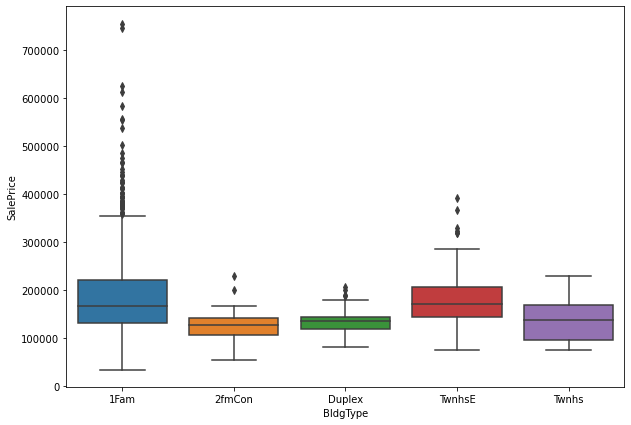

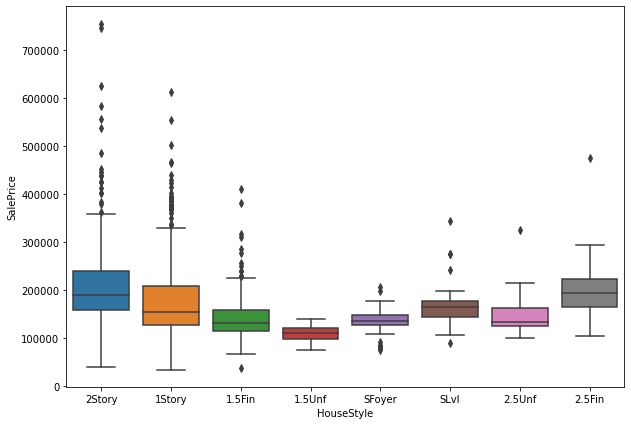

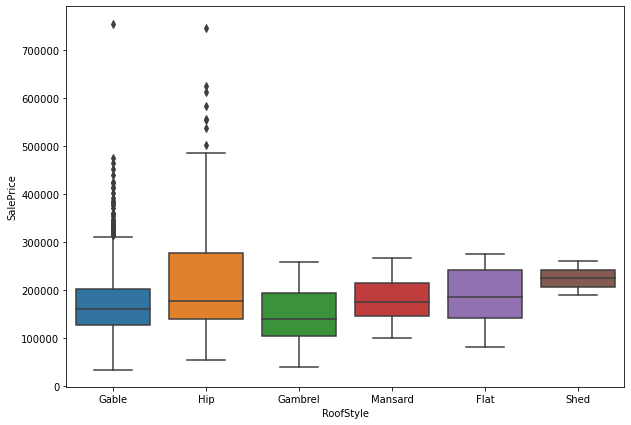

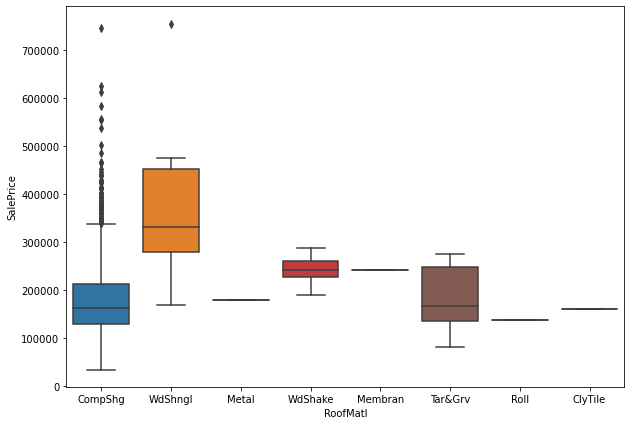

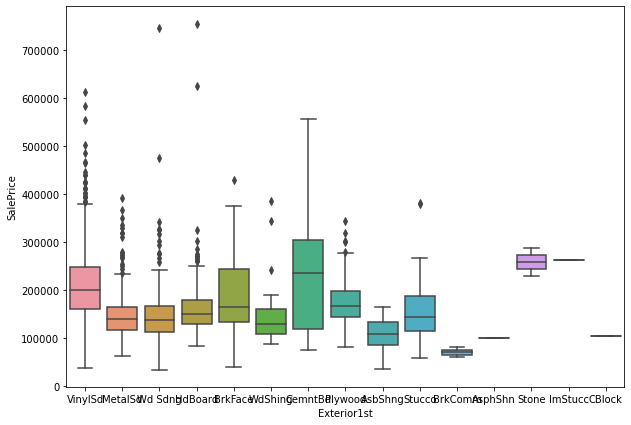

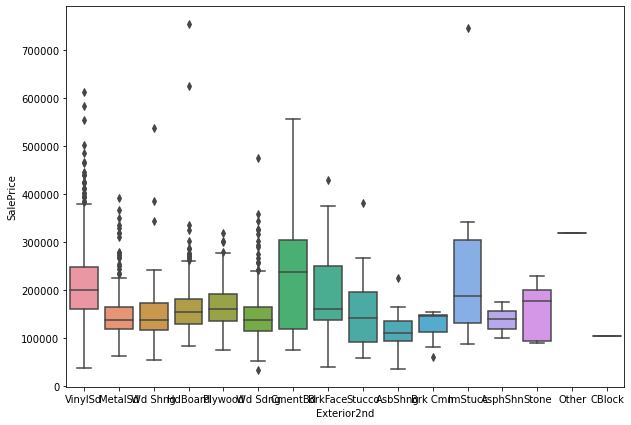

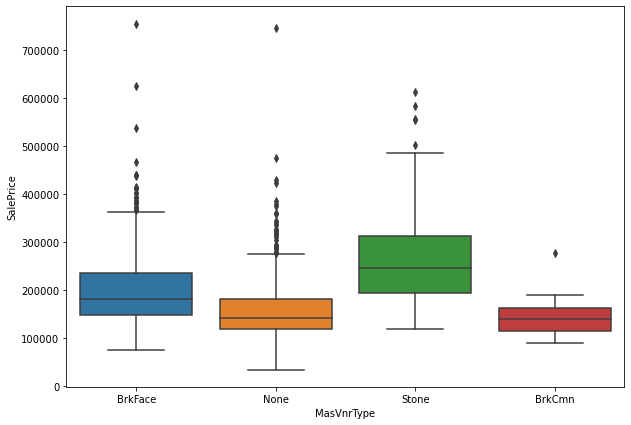

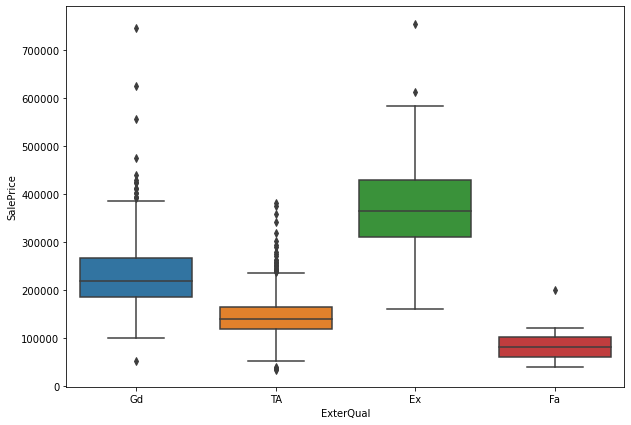

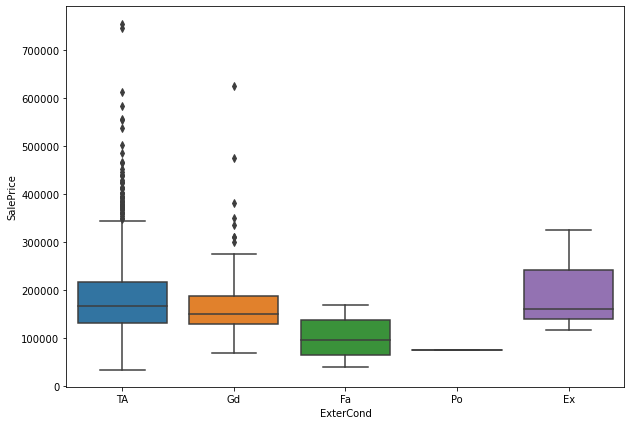

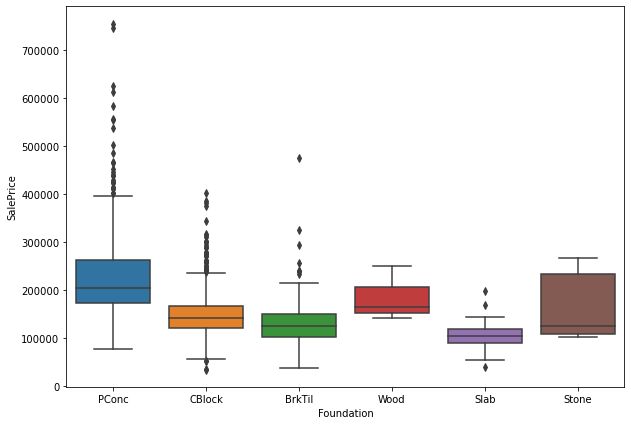

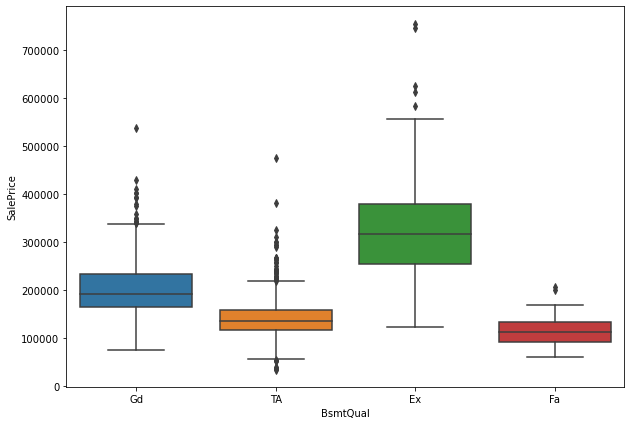

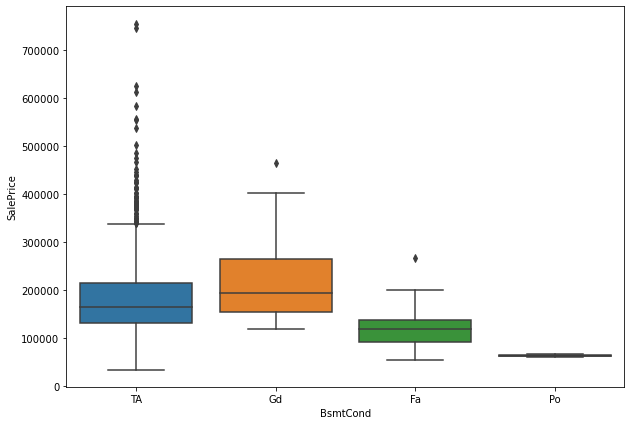

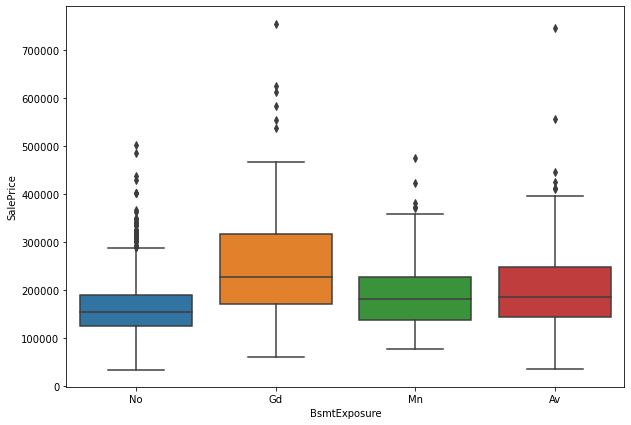

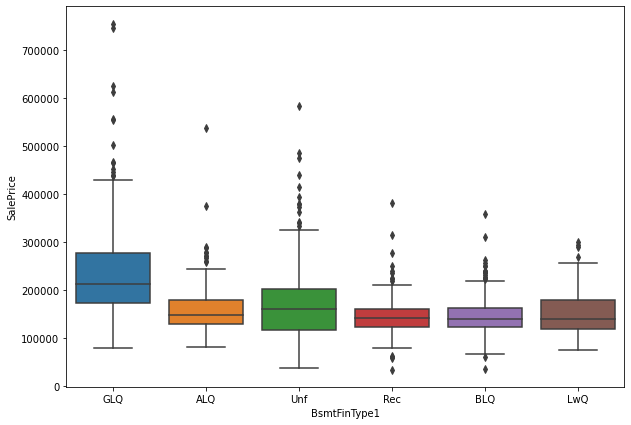

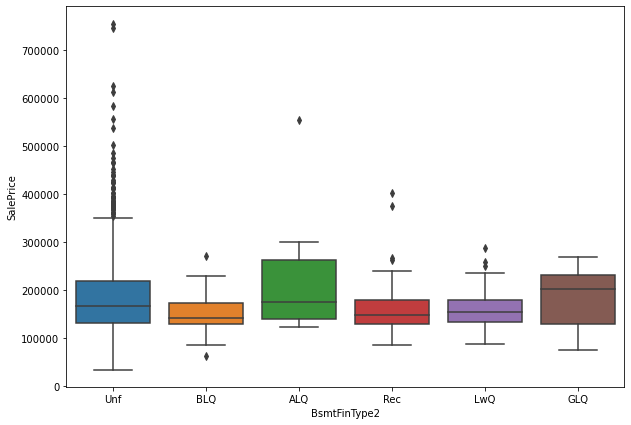

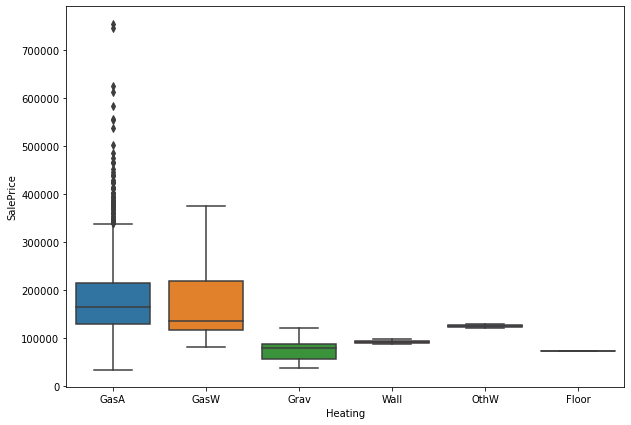

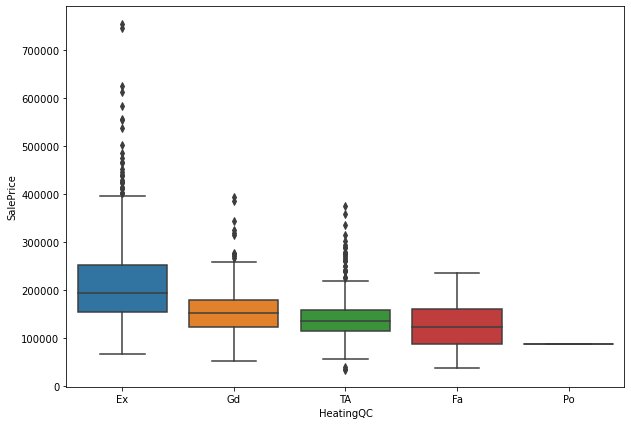

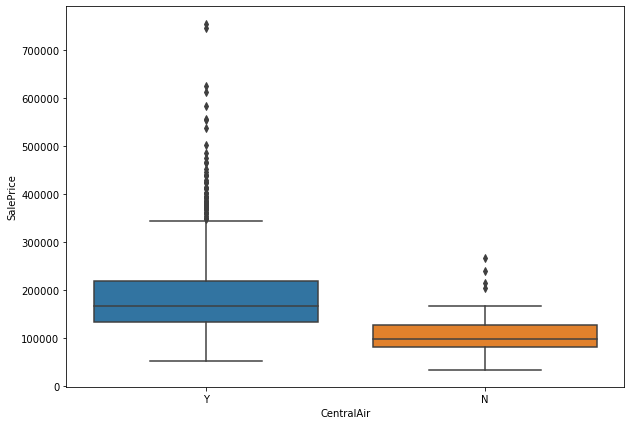

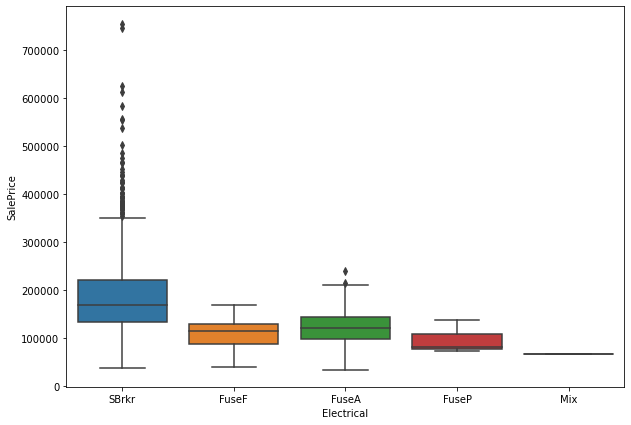

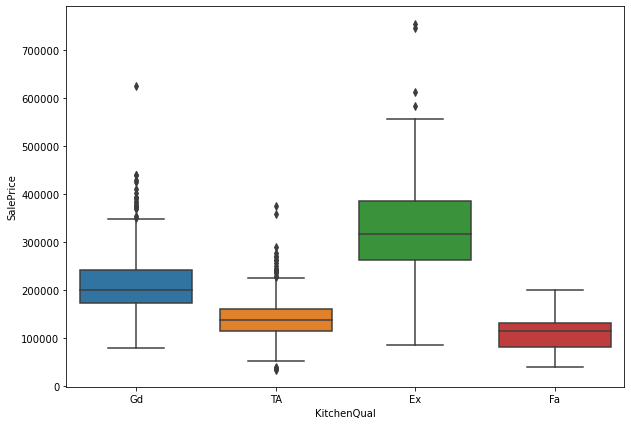

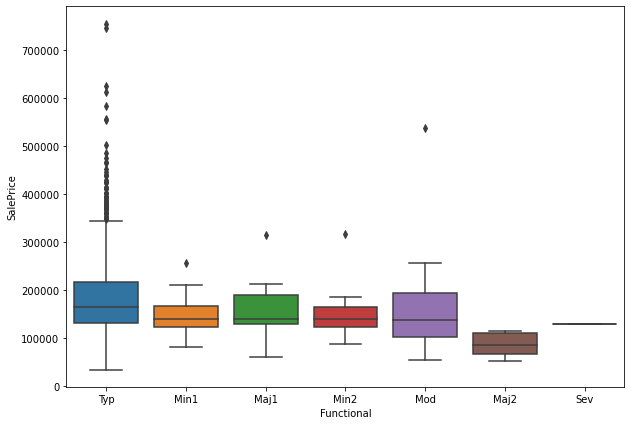

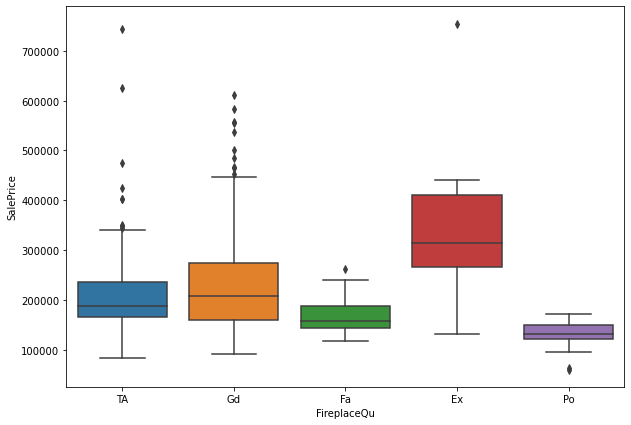

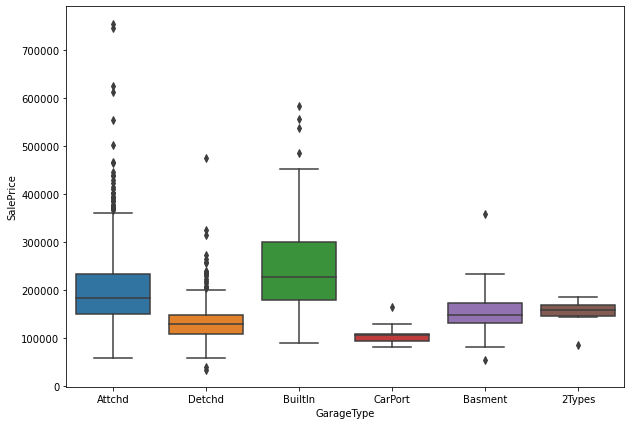

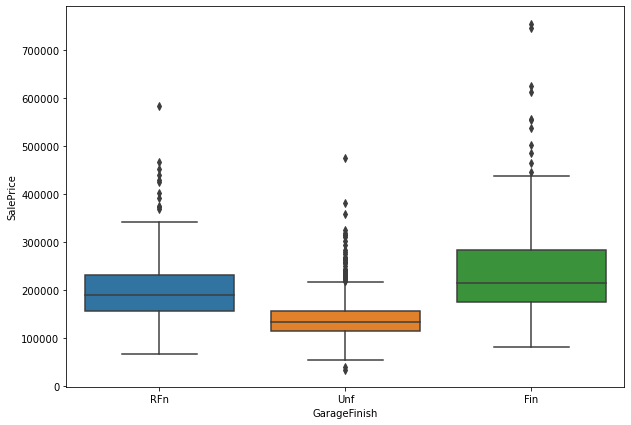

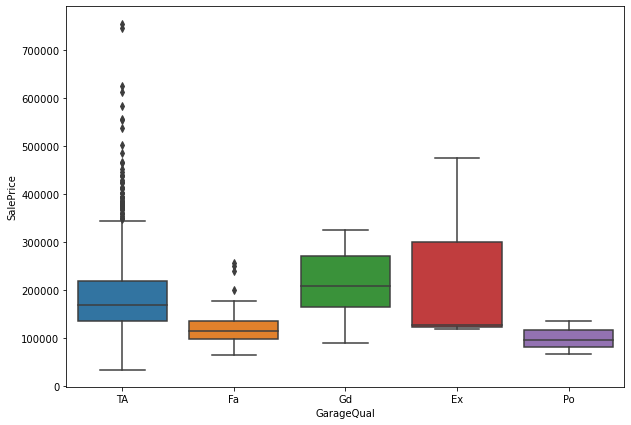

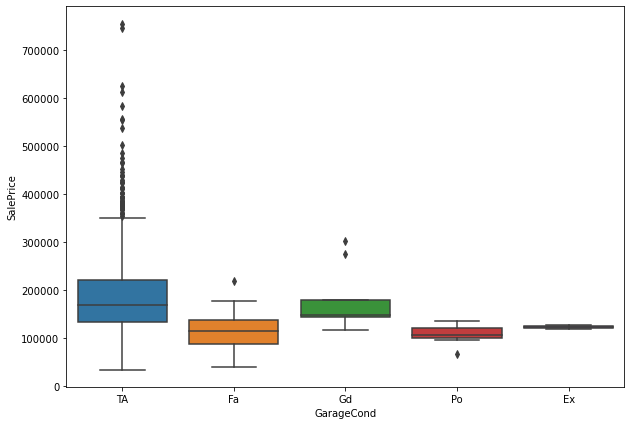

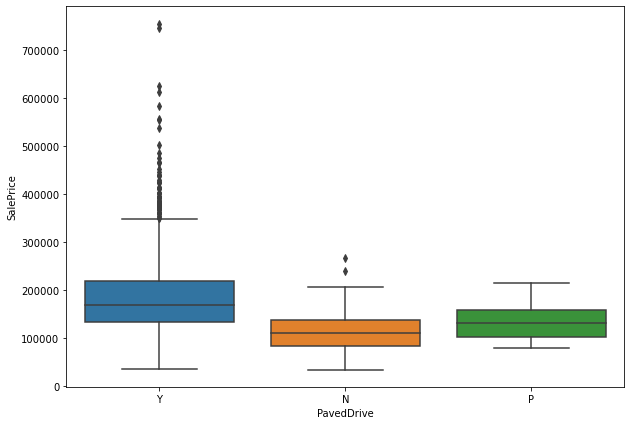

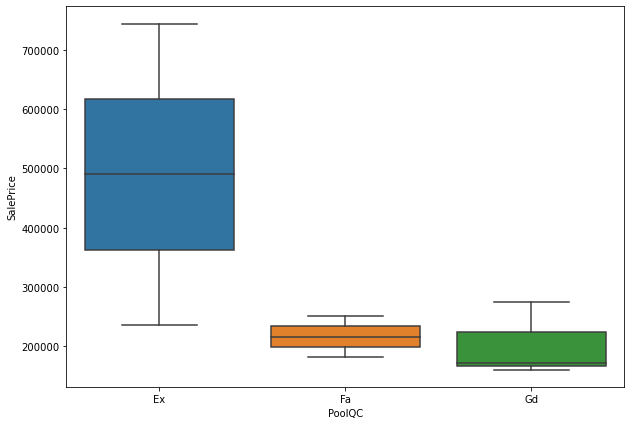

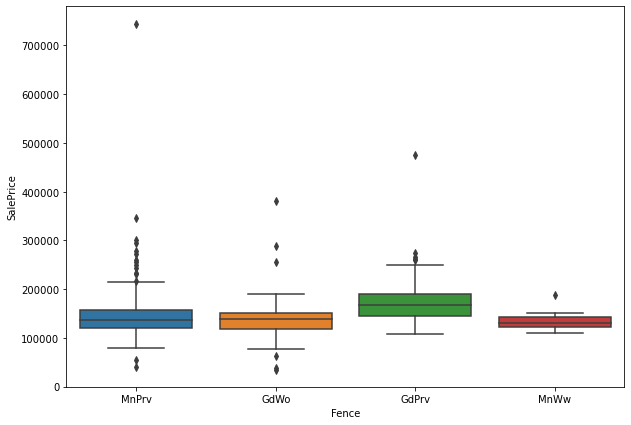

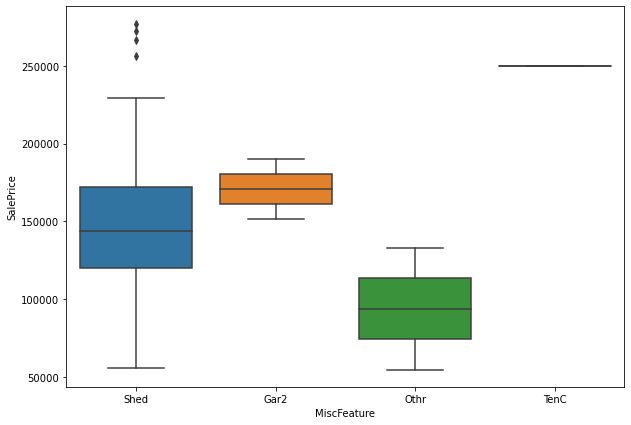

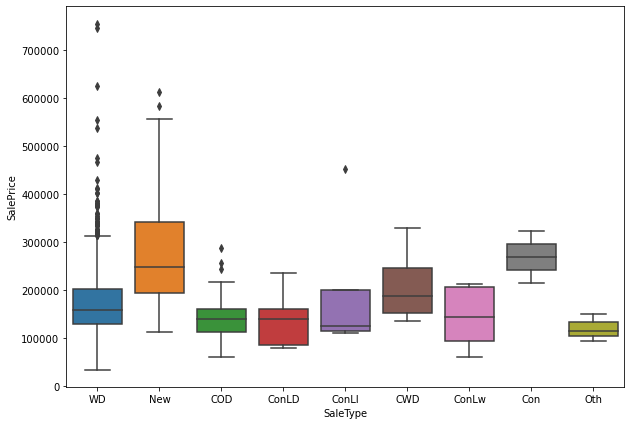

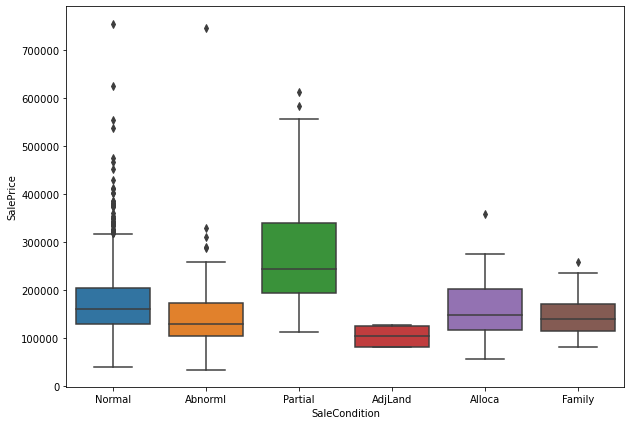

In [10]:
for i in range(1,len(df.select_dtypes(exclude=['int64','float64']).columns)+1):
    plt.figure(figsize=(10,7))
    sns.boxplot(x=df.select_dtypes(exclude=['int64','float64']).columns[i-1],y='SalePrice',data=df)
    plt.show()

-Among MSZoning, RL and FV have a very high sale price with median around 180000 to 210000
-Paved Alley have a high sale price
-Condition2 with PosN and roofmatl with WoodShngl have a high impact on the price
-Among MasVnr, stone syle houses are expensive while brkcmn are cheap.
-Houses with builtin garages are expensive.
-houses without Miscfeatures without shed or gar2 are cheap
-Partial Sale condition prices are higher.





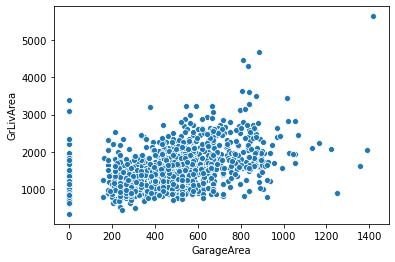

In [11]:
sns.scatterplot(x='GarageArea', y='GrLivArea',data=df)

We can remove garage area since both have a strong relationship

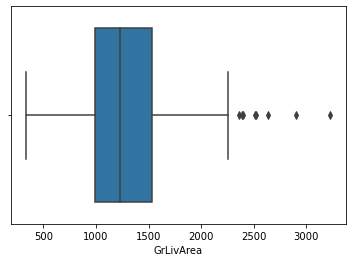

In [12]:
sns.boxplot(df[df['2ndFlrSF'] == 0]['GrLivArea'])

We can see houses with area more than 1500 have 2 floors

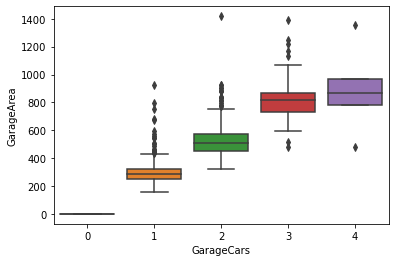

In [13]:
sns.boxplot(x='GarageCars',y='GarageArea',data=df)

More the garage area, more the cars. Hence we can remove garagecars

# Data Processing

In [14]:
#Dropping the ID column and imbalanced columns

df = df.drop('Id',axis=1)

#Dropping columns with high class imbalance

print(df['Alley'].value_counts())
df = df.drop('Alley',axis=1)

print(df['Condition2'].value_counts())
df = df.drop('Condition2',axis=1)

print(df['Heating'].value_counts())
df = df.drop('Heating',axis=1)

print(df['LandSlope'].value_counts())
df = df.drop('LandSlope',axis=1)

print(df['Utilities'].value_counts())
df = df.drop('Utilities',axis=1)

print(df['RoofMatl'].value_counts())
df = df.drop('RoofMatl',axis=1)

print(df['Street'].value_counts())
df = df.drop('Street',axis=1)

df.head()

Grvl    50
Pave    41
Name: Alley, dtype: int64
Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Membran       1
ClyTile       1
Metal         1
Name: RoofMatl, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
#Dropping Poolqc,Fence,MiscFeature because of high class imbalance

df = df.drop(['PoolQC','Fence','MiscFeature'],axis=1)

In [16]:
#Dropping FireplaceQu since more than 40% houses have no such feature

df = df.drop('FireplaceQu',axis=1)

In [17]:
#We dont need garage year since we will use the age of whole house

df = df.drop('GarageYrBlt',axis=1)

In [18]:
#Imputing mean value for the missing values in LotFrontage

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['LotFrontage'].isnull().sum()

0

In [19]:
#Checking the missing values

100*df.isnull().sum()/len(df)

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
LotShape         0.000000
LandContour      0.000000
LotConfig        0.000000
Neighborhood     0.000000
Condition1       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.068493
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea   

In [20]:
#Lets quantify the ordinal scale

scale_metric = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.nan:0}

In [21]:
#Replacing the ratings with quantitative numbers

df['ExterQual'] = df['ExterQual'].map(scale_metric)
df['ExterQual'].head()

0    4
1    3
2    4
3    3
4    4
Name: ExterQual, dtype: int64

In [22]:
##Replacing the ratings with quantitative numbers

df['ExterCond'] = df['ExterCond'].map(scale_metric)
df['ExterCond'].head()

0    3
1    3
2    3
3    3
4    3
Name: ExterCond, dtype: int64

In [23]:
##Replacing the ratings with quantitative numbers

df['BsmtQual'] = df['BsmtQual'].map(scale_metric)
df['BsmtQual'].head()

0    4
1    4
2    4
3    3
4    4
Name: BsmtQual, dtype: int64

In [24]:
##Replacing the ratings with quantitative numbers

df['BsmtCond'] = df['BsmtCond'].map(scale_metric)
df['BsmtCond'].unique()

array([3, 4, 0, 2, 1], dtype=int64)

In [25]:
exposure = {'Gd':4,'Av':3,'Mn':2,'No':1,np.nan:0}

##Replacing the ratings with quantitative numbers

df['BsmtExposure'] = df['BsmtExposure'].map(exposure)
df['BsmtExposure'].unique()

array([1, 4, 2, 3, 0], dtype=int64)

In [26]:
##Replacing the ratings with quantitative numbers

Fin = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,np.nan:0}

df['BsmtFinType1'] = df['BsmtFinType1'].map(Fin)
df['BsmtFinType1'].isnull().sum()

0

In [27]:
##Replacing the ratings with quantitative numbers

df['BsmtFinType2'] = df['BsmtFinType2'].map(Fin)
df['BsmtFinType2'].isnull().sum()

0

In [28]:
#Replacing with the mode since its a categorical column

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Electrical'].isnull().sum()


0

In [29]:
#Replacing Na with no garage as per the data dictionary

df['GarageType'] = df['GarageType'].fillna('No_Garage')
df['GarageType'].isnull().sum()

0

In [30]:
#Replacing Na with no garage as per the data dictionary

df['GarageFinish'] = df['GarageFinish'].fillna('No_Garage')
df['GarageFinish'].isnull().sum()

0

In [31]:
##Replacing the ratings with quantitative numbers

df['GarageQual'] = df['GarageQual'].map(scale_metric)
df['GarageQual'].isnull().sum()

0

In [32]:
##Replacing the ratings with quantitative numbers

df['GarageCond'] = df['GarageCond'].map(scale_metric)
df['GarageCond'].isnull().sum()

0

In [33]:
#Replacing with the mode since its a categorical column

df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrType'].isnull().sum()

0

In [34]:
#Replacing with the median since the column is highly skewed

df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['MasVnrArea'].isnull().sum()

0

In [35]:
##Replacing the ratings with quantitative numbers

df['HeatingQC'] = df['HeatingQC'].map(scale_metric)
df['HeatingQC'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [36]:
##Replacing the ratings with quantitative numbers

df['KitchenQual'] = df['KitchenQual'].map(scale_metric)
df['KitchenQual'].unique()

array([4, 3, 5, 2], dtype=int64)

In [37]:
#Checking for missing values again

100*df.isnull().sum()/len(df)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
Neighborhood     0.0
Condition1       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional   

Missing Values have been treated

## Handeling Categorical columns

In [38]:
#Lets squeeze the categorical groups with counts less than 50 for the following variables

neigh = df['Neighborhood'].value_counts().reset_index()
neigh_less_50 = neigh[neigh['Neighborhood']<50]
neigh_dict={}

for i in neigh_less_50['index']:
    neigh_dict[i]='others'
    
df['Neighborhood'] = df['Neighborhood'].replace(neigh_dict)
df['Neighborhood'].value_counts()

others     315
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Name: Neighborhood, dtype: int64

In [39]:
#Lets squeeze the categorical groups with counts less than 50 for the following variables

cond1 = df['Condition1'].value_counts().reset_index()
cond1_less_50 = cond1[cond1['Condition1']<50]
cond1_dict={}

for i in cond1_less_50['index']:
    cond1_dict[i]='others'
    
df['Condition1'] = df['Condition1'].replace(cond1_dict)
df['Condition1'].value_counts()

Norm      1260
others     119
Feedr       81
Name: Condition1, dtype: int64

In [40]:
#Lets squeeze the categorical groups with counts less than 50 for the following variables

roofst = df['RoofStyle'].value_counts().reset_index()
roofst_less_50 = roofst[roofst['RoofStyle']<50]
roofst_dict={}

for i in roofst_less_50['index']:
    roofst_dict[i]='others'
    
df['RoofStyle'] = df['RoofStyle'].replace(roofst_dict)
df['RoofStyle'].value_counts()

Gable     1141
Hip        286
others      33
Name: RoofStyle, dtype: int64

In [41]:
#Lets squeeze the categorical groups with counts less than 50 for the following variables

ext1 = df['Exterior1st'].value_counts().reset_index()
ext1_less_50 = ext1[ext1['Exterior1st']<50]
ext1_dict={}

for i in ext1_less_50['index']:
    ext1_dict[i]='others'
    
df['Exterior1st'] = df['Exterior1st'].replace(ext1_dict)
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
others      78
CemntBd     61
BrkFace     50
Name: Exterior1st, dtype: int64

In [42]:
#Lets squeeze the categorical groups with counts less than 50 for the following variables

ext2 = df['Exterior2nd'].value_counts().reset_index()
ext2_less_50 = ext2[ext2['Exterior2nd']<50]
ext2_dict={}

for i in ext2_less_50['index']:
    ext2_dict[i]='others'
    
df['Exterior2nd'] = df['Exterior2nd'].replace(ext2_dict)
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
others     136
CmentBd     60
Name: Exterior2nd, dtype: int64

In [43]:
#Lets squeeze the categorical groups with counts less than 50 for the following variables

found = df['Foundation'].value_counts().reset_index()
found_less_50 = found[found['Foundation']<50]
found_dict={}

for i in found_less_50['index']:
    found_dict[i]='others'
    
df['Foundation'] = df['Foundation'].replace(found_dict)
df['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
others     33
Name: Foundation, dtype: int64

In [44]:
#Lets squeeze the categorical groups with counts less than 100 for the following variables

elec = df['Electrical'].value_counts().reset_index()
elec_less_100 = elec[elec['Electrical']<100]
elec_dict={}

for i in elec_less_100['index']:
    elec_dict[i]='others'
    
df['Electrical'] = df['Electrical'].replace(elec_dict)
df['Electrical'].value_counts()

SBrkr     1335
others     125
Name: Electrical, dtype: int64

In [45]:
#Lets squeeze the categorical groups with counts less than 50 for the following variables

func = df['Functional'].value_counts().reset_index()
func_less_50 = func[func['Functional']<50]
func_dict={}

for i in func_less_50['index']:
    func_dict[i]='others'
    
df['Functional'] = df['Functional'].replace(func_dict)
df['Functional'].value_counts()

Typ       1360
others     100
Name: Functional, dtype: int64

In [46]:
#Lets squeeze the categorical groups with counts less than 50 for the following variables

gart = df['GarageType'].value_counts().reset_index()
gart_less_50 = gart[gart['GarageType']<50]
gart_dict={}

for i in gart_less_50['index']:
    gart_dict[i]='others'
    
df['GarageType'] = df['GarageType'].replace(gart_dict)
df['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No_Garage     81
others        34
Name: GarageType, dtype: int64

In [47]:
#Lets squeeze the categorical groups with counts less than 50 for the following variables

st = df['SaleType'].value_counts().reset_index()
st_less_50 = st[st['SaleType']<50]
st_dict={}

for i in st_less_50['index']:
    st_dict[i]='others'
    
df['SaleType'] = df['SaleType'].replace(st_dict)
df['SaleType'].value_counts()

WD        1267
New        122
others      71
Name: SaleType, dtype: int64

In [48]:
#Lets squeeze the categorical groups with counts less than 50 for the following variables

sc = df['SaleCondition'].value_counts().reset_index()
sc_less_50 = sc[sc['SaleCondition']<50]
sc_dict={}

for i in sc_less_50['index']:
    sc_dict[i]='others'
    
df['SaleCondition'] = df['SaleCondition'].replace(sc_dict)
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
others       36
Name: SaleCondition, dtype: int64

In [49]:
#Lets squeeze the categorical groups with counts less than 50 for the following variables

ms = df['MSZoning'].value_counts().reset_index()
ms_less_50 = ms[ms['MSZoning']<50]
ms_dict={}

for i in ms_less_50['index']:
    ms_dict[i]='others'
    
df['MSZoning'] = df['MSZoning'].replace(ms_dict)
df['MSZoning'].value_counts()

RL        1151
RM         218
FV          65
others      26
Name: MSZoning, dtype: int64

In [50]:
#Calculating the age of the house and dropping the year built column

df['House_year_old'] = (df['YrSold']-df['YearBuilt'])
df['House_year_old']
                          
df = df.drop(['YearBuilt','YrSold','MoSold'],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,House_year_old
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,Attchd,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,others,Feedr,1Fam,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,Attchd,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,Attchd,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1970,Gable,Wd Sdng,others,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,Detchd,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,others,Norm,1Fam,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,Attchd,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,WD,Normal,250000,8


In [51]:
#Calculating the remod age of house and dropping the remod year column

df['Remod_year_old'] = (2020-df['YearRemodAdd'])
df['Remod_year_old']

df = df.drop('YearRemodAdd',axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,House_year_old,Remod_year_old
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,Attchd,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,WD,Normal,208500,5,17
1,20,RL,80.0,9600,Reg,Lvl,FR2,others,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,Attchd,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,WD,Normal,181500,31,44
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,Attchd,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,WD,Normal,223500,7,18
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,others,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,Detchd,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,91,50
4,60,RL,84.0,14260,IR1,Lvl,FR2,others,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,Attchd,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,WD,Normal,250000,8,20


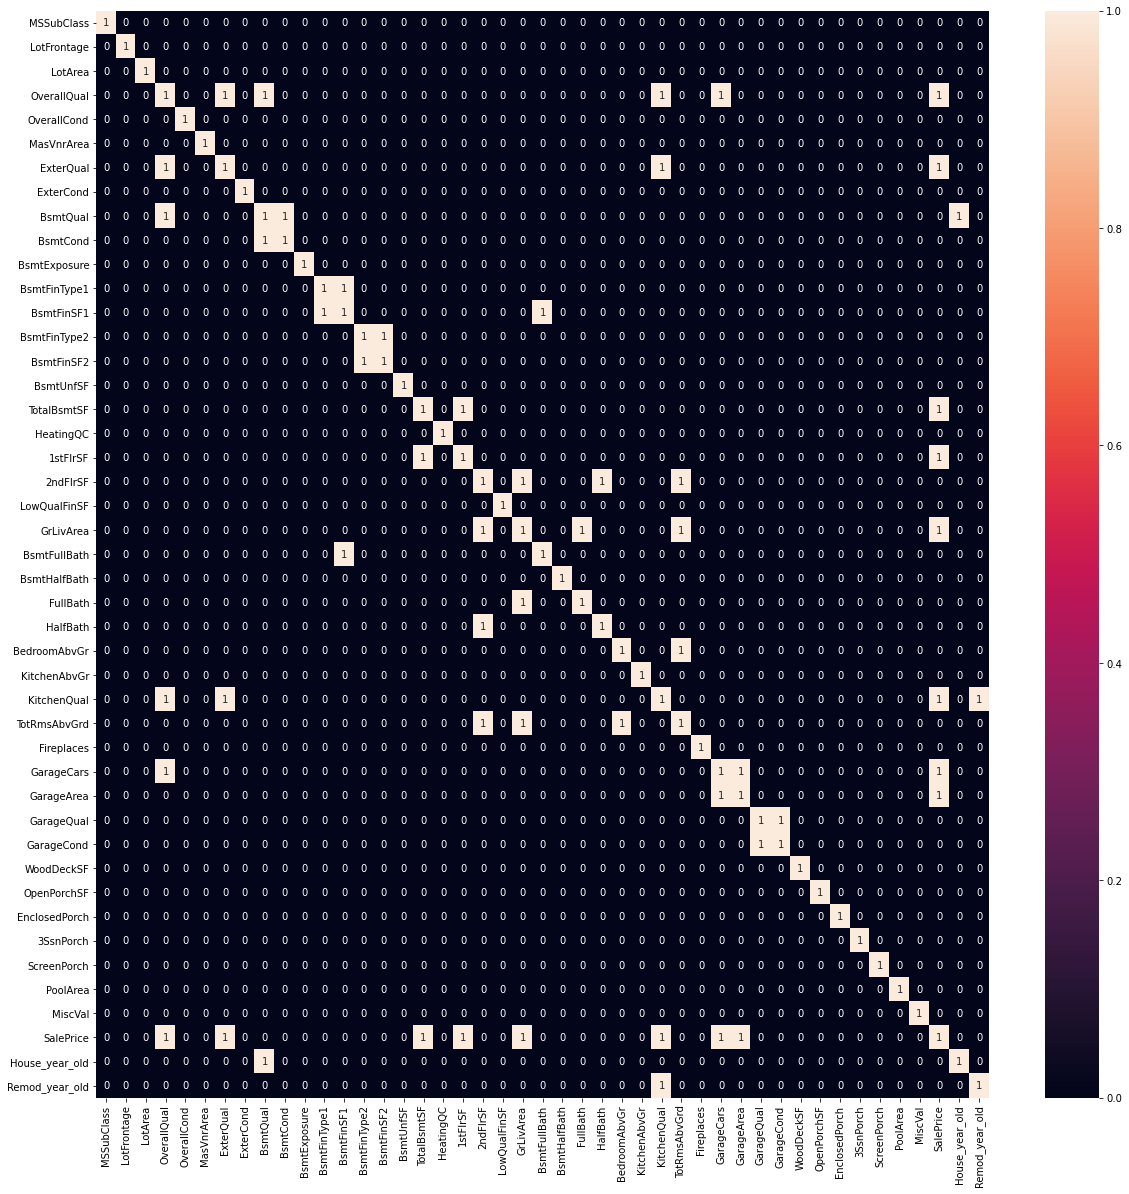

In [52]:
#Lets check for highly correlated variables with pearson R greater than 0.6 or less than -0.6

plt.figure(figsize=(20,20))
sns.heatmap(((df.corr() > 0.6) | (df.corr() < -0.6)),annot=True)
plt.show()

In [53]:
#Removing the highly related independent variables with correlation greater than 0.6 or less than -0.6

df = df.drop(['ExterQual','BsmtQual','KitchenQual','GarageCars','BsmtFullBath','2ndFlrSF','TotRmsAbvGrd','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','FullBath','GarageCond'],axis=1)

Creating Dummies

In [54]:
#Lets make a list of all categorical columns

cat_column = df.select_dtypes(exclude=['int64','float64']).columns
cat_column

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [55]:
#Lets create the dummies and remove the first column to reduce redundancy

dummies = pd.get_dummies(df[cat_column],drop_first=True)
dummies

,MSZoning_RL,MSZoning_RM,MSZoning_others,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_others,Condition1_Norm,Condition1_others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_others,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_others,CentralAir_Y,Electrical_others,Functional_others,GarageType_BuiltIn,GarageType_Detchd,GarageType_No_Garage,GarageType_others,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_WD,SaleType_others,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_others
0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
1456,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0
1457,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
1458,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0


In [56]:
#merging the dummy columns with the original dataset

df = pd.concat([df,dummies],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,House_year_old,Remod_year_old,MSZoning_RL,MSZoning_RM,MSZoning_others,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_others,Condition1_Norm,Condition1_others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_others,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_others,CentralAir_Y,Electrical_others,Functional_others,GarageType_BuiltIn,GarageType_Detchd,GarageType_No_Garage,GarageType_others,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_WD,SaleType_others,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_others
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,3,PConc,3,1,6,1,150,5,Y,SBrkr,856,0,1710,0,1,3,1,Typ,0,Attchd,RFn,548,3,Y,0,61,0,0,0,0,0,WD,Normal,208500,5,17,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,others,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,3,4,5,1,284,5,Y,SBrkr,1262,0,1262,1,0,3,1,Typ,1,Attchd,RFn,460,3,Y,298,0,0,0,0,0,0,WD,Normal,181500,31,44,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,3,PConc,3,2,6,1,434,5,Y,SBrkr,920,0,1786,0,1,3,1,Typ,1,Attchd,RFn,608,3,Y,0,42,0,0,0,0,0,WD,Normal,223500,7,18,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,others,None,0.0,3,BrkTil,4,1,5,1,540,4,Y,SBrkr,961,0,1717,0,0,3,1,Typ,1,Detchd,Unf,642,3,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,91,50,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0
4,60,RL,84.0,14260,IR1,Lvl,FR2,others,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,3,PConc,3,3,6,1,490,5,Y,SBrkr,1145,0,2198,0,1,4,1,Typ,1,Attchd,RFn,836,3,Y,192,84,0,0,0,0,0,WD,Normal,250000,8,20,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0


In [57]:
#dropping the original categorical columns from the dateset

df = df.drop(cat_column,axis=1)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,1stFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,House_year_old,Remod_year_old,MSZoning_RL,MSZoning_RM,MSZoning_others,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_others,Condition1_Norm,Condition1_others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_others,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_others,CentralAir_Y,Electrical_others,Functional_others,GarageType_BuiltIn,GarageType_Detchd,GarageType_No_Garage,GarageType_others,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_WD,SaleType_others,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_others
0,60,65.0,8450,7,5,196.0,3,3,1,6,1,150,5,856,0,1710,0,1,3,1,0,548,3,0,61,0,0,0,0,0,208500,5,17,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
1,20,80.0,9600,6,8,0.0,3,3,4,5,1,284,5,1262,0,1262,1,0,3,1,1,460,3,298,0,0,0,0,0,0,181500,31,44,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
2,60,68.0,11250,7,5,162.0,3,3,2,6,1,434,5,920,0,1786,0,1,3,1,1,608,3,0,42,0,0,0,0,0,223500,7,18,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
3,70,60.0,9550,7,5,0.0,3,4,1,5,1,540,4,961,0,1717,0,0,3,1,1,642,3,0,35,272,0,0,0,0,140000,91,50,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0
4,60,84.0,14260,8,5,350.0,3,3,3,6,1,490,5,1145,0,2198,0,1,4,1,1,836,3,192,84,0,0,0,0,0,250000,8,20,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0


## Treating Target Column:SalePrice

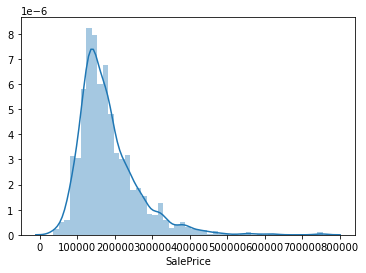

In [58]:
#We observe the target variable is not stable, like the normal distribution seems disturbed. Lets apply log transformation and check the distribution

sns.distplot(df['SalePrice'])

In [59]:
#applying log transformation

df['SalePrice'] = np.log(df['SalePrice'])
df['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

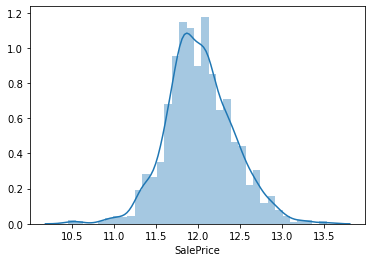

In [60]:
#Checking the new distribution. We observe the target variable is normally distributed now

sns.distplot(df['SalePrice'])

In [61]:
cont_column = df.select_dtypes(include=['int64','float64']).columns.drop('SalePrice')
cont_column

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'House_year_old', 'Remod_year_old'],
      dtype='object')

## Train - Test Split ##

In [62]:
#Lets split the data set into X and y

from sklearn.model_selection import train_test_split
X = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Selecting features using RFE ##

In [63]:
#Lets import the linear regression package

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [64]:
#Importing RFE and running for 25 variables

from sklearn.feature_selection import RFE
rfe = RFE(linreg, 25)
rfe = rfe.fit(X_train, y_train)

In [65]:
#Packing the list of selected columns in a list

col = X_train.columns[rfe.support_]

In [66]:
#Lets use statsmodel to check the R, adj R and the P values

import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
linm1 = sm.OLS(y_train,X_train_sm)
res = linm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:40:10   Log-Likelihood:                 349.13
No. Observations:                1022   AIC:                            -646.3
Df Residuals:                     996   BIC:                            -518.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.6169      0.051    208.261      0.000      10.517      10.717
OverallQual               0.1407      0.006     23.497      0.000       0.129       0.152
BedroomAbvGr              0.0601      0.008      7.947      0.000       0.045       0.075
Fireplaces                0.0901      0.010      8.896      0.000       0.070       0.110
GarageQual                0.0748      0.010      7.853      0.000       0.056       0.093
MSZoning_RM              -0.0854      0.018     -4.851      0.000      -0.120      -0.051
MSZoning_others          -0.1581      0.041     -3.813      0.000      -0.239      -0.077
LandContour_HLS           0.0891      0.042      2.143      0.032       0.007       0.171
LandContour_Low           0.2382      0.044      5.459      0.000       0.153       0.324
LandContour_Lvl           0.0918      0.029      3.193      0.001       0.035       0.148
LotConfig_CulDSac         0.0999      0.023      4.344      0.000       0.055       0.145
Neighborhood_Crawfor      0.1595      0.034      4.743      0.000       0.094       0.225
Neighborhood_Gilbert     -0.1296      0.027     -4.792      0.000      -0.183      -0.077
Neighborhood_NridgHt      0.1236      0.027      4.653      0.000       0.071       0.176
Condition1_others        -0.0617      0.020     -3.119      0.002      -0.101      -0.023
BldgType_Twnhs           -0.1625      0.032     -5.068      0.000      -0.225      -0.100
BldgType_TwnhsE          -0.0949      0.024     -4.008      0.000      -0.141      -0.048
HouseStyle_1.5Unf        -0.0905      0.050     -1.803      0.072      -0.189       0.008
HouseStyle_2.5Fin         0.2220      0.091      2.442      0.015       0.044       0.400
Exterior1st_Wd Sdng      -0.0605      0.017     -3.466      0.001      -0.095      -0.026
Exterior1st_others       -0.0956      0.024     -3.972      0.000      -0.143      -0.048
Foundation_PConc          0.0902      0.015      5.957      0.000       0.061       0.120
CentralAir_Y              0.0936      0.024      3.865      0.000       0.046       0.141
GarageFinish_RFn         -0.0681      0.016     -4.343      0.000      -0.099      -0.037
GarageFinish_Unf         -0.1311      0.017     -7.549      0.000      -0.165      -0.097
SaleCondition_Partial     0.0616      0.022      2.742      0.006       0.018       0.106
==============================================================================
Omnibus:                       53.688   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.994
Skew:                          -0.118   Prob(JB):                     6.07e-39
Kurtosis:                       5.019   Cond. No.                         129.
==============================================================================

We observe R2 of around 83.5% with few variables having high P values. The top 5 variables identified are-
1 . LandContour_Low
2 . HouseStyle_2.5Fin
3 . Neighborhood_Crawfor
4 . BldgType_Twnhs	
5 . MSZoning_others
6 . OverallQual

In [67]:
#Lets import the advanced regression packages and the crossvalidation package

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [68]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
#Lets find the best alpha obtained from grid search

model_cv.best_estimator_

Ridge(alpha=20)

In [70]:
#Lets analyse the negative mean square for different values of alphas

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005772,2.304958e-03,0.002985,0.001086,0.0001,{'alpha': 0.0001},-0.098321,-0.100762,-0.108674,-0.089109,-0.093001,-0.097973,0.006719,26,-0.085864,-0.076137,-0.078823,-0.086254,-0.085853,-0.082586,0.004257
1,0.004788,1.466855e-03,0.002408,0.000493,0.001,{'alpha': 0.001},-0.098320,-0.100760,-0.108672,-0.089096,-0.092989,-0.097967,0.006723,25,-0.085864,-0.076137,-0.078822,-0.086254,-0.085854,-0.082586,0.004257
2,0.003790,7.464947e-04,0.001995,0.000631,0.01,{'alpha': 0.01},-0.098311,-0.100735,-0.108658,-0.088977,-0.092885,-0.097913,0.006763,24,-0.085863,-0.076138,-0.078822,-0.086253,-0.085869,-0.082589,0.004259
3,0.003990,3.234067e-07,0.002600,0.000495,0.05,{'alpha': 0.05},-0.098272,-0.100630,-0.108595,-0.088594,-0.092542,-0.097726,0.006887,23,-0.085860,-0.076144,-0.078820,-0.086248,-0.085924,-0.082599,0.004265
4,0.004189,3.984453e-04,0.002393,0.000488,0.1,{'alpha': 0.1},-0.098220,-0.100516,-0.108511,-0.088308,-0.092270,-0.097565,0.006967,22,-0.085853,-0.076151,-0.078816,-0.086241,-0.085973,-0.082607,0.004269


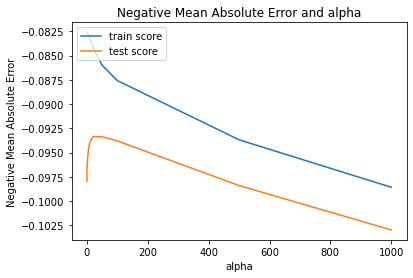

In [71]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [72]:
#Lets apply the best estimator and fit into X_train and y_train

alpha = 20
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train, y_train)

Ridge(alpha=20)

In [73]:
#Lets predict the X_train and convert it back to original format

ridge_result_train = pd.DataFrame({'y_train':[np.exp(y) for y in y_train],'y_train_pred':[np.exp(y) for y in ridge1.predict(X_train)]})
ridge_result_train

,y_train,y_train_pred
0,98000.0,87834.030079
1,260000.0,311204.804450
2,113000.0,121986.383955
3,117000.0,134993.323006
4,122500.0,124724.013834
...,...,...
1017,189000.0,199038.589189
1018,385000.0,314269.450207
1019,318061.0,271925.466474
1020,110000.0,111542.418695


In [74]:
#Checking the coefficients

ridge1.coef_

array([-5.98871983e-04, -4.44712396e-04,  1.90455052e-06,  6.83076747e-02,
        3.29774033e-02, -1.49305816e-05, -8.25923238e-03,  1.13048263e-02,
        2.34857099e-02,  1.62683602e-02,  2.60621504e-04, -1.27424695e-05,
        1.19408484e-02,  6.34732112e-06, -4.35332458e-05,  2.70930935e-04,
       -6.16958222e-03,  1.57537205e-02,  2.04362534e-02, -3.65259875e-03,
        3.91755286e-02,  1.72141765e-04,  1.95335287e-02,  1.11369456e-04,
       -5.29143574e-05,  1.60640356e-04,  2.38754669e-04,  2.26493674e-04,
       -6.18527717e-04, -1.04622245e-05, -1.75416266e-03, -1.16556633e-03,
        3.90059171e-02, -2.42372610e-02, -5.64896788e-02,  1.33565611e-02,
       -3.73228387e-02,  1.13502233e-03,  2.99177673e-02,  3.49688481e-02,
        3.33329070e-02,  3.71137785e-02, -1.85864624e-02, -1.88800283e-03,
       -5.20753369e-03, -3.98337425e-02,  7.83666100e-02, -7.30139478e-02,
       -3.12447379e-02, -1.63029407e-02, -1.57246796e-02,  6.65105452e-02,
       -1.20378255e-02, -

In [75]:
#Lets map the names of the columns by their coefficient values

ridge1_coefficients = pd.DataFrame({'columns':X_train.columns,'coefficient':ridge1.coef_})
ridge1_coefficients

,columns,coefficient
0,MSSubClass,-0.000599
1,LotFrontage,-0.000445
2,LotArea,0.000002
3,OverallQual,0.068308
4,OverallCond,0.032977
5,MasVnrArea,-0.000015
6,ExterCond,-0.008259
7,BsmtCond,0.011305
8,BsmtExposure,0.023486
9,BsmtFinType1,0.016268


In [76]:
ridge1_coefficients.sort_values(by=['coefficient'],ascending=False)

,columns,coefficient
46,Neighborhood_Crawfor,0.078367
3,OverallQual,0.068308
51,Neighborhood_NridgHt,0.066511
55,Neighborhood_Somerst,0.054886
57,Condition1_Norm,0.050885
20,Fireplaces,0.039176
32,MSZoning_RL,0.039006
106,SaleCondition_Partial,0.038800
105,SaleCondition_Normal,0.037119
41,LotConfig_CulDSac,0.037114


In [77]:
#Lets check the r2 of train

from sklearn.metrics import r2_score
r2_score(ridge_result_train['y_train'],ridge_result_train['y_train_pred'])

0.8433285925373311

In [78]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ridge_result_train['y_train'],ridge_result_train['y_train_pred'])

15807.634989993858

If we increase alpha twice ie. to 40

In [79]:
alpha = 40
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)

Ridge(alpha=40)

In [80]:
ridge_result_train_double = pd.DataFrame({'y_train':[np.exp(y) for y in y_train],'y_train_pred':[np.exp(y) for y in ridge2.predict(X_train)]})
ridge_result_train_double

,y_train,y_train_pred
0,98000.0,88330.266838
1,260000.0,309143.032431
2,113000.0,120893.542105
3,117000.0,134948.177675
4,122500.0,122047.860390
...,...,...
1017,189000.0,200072.735885
1018,385000.0,317770.834751
1019,318061.0,268852.096388
1020,110000.0,110895.298646


In [81]:
r2_score(ridge_result_train_double['y_train'],ridge_result_train_double['y_train_pred'])

0.8289592348210253

In [82]:
mean_absolute_error(ridge_result_train_double['y_train'],ridge_result_train_double['y_train_pred'])

16040.997519260825

We observe the mean absolute error has increased from 15807 to 16040.

In [83]:
#Lets predict the X_test and convert it back to original format

ridge_result_test = pd.DataFrame({'y_test':[np.exp(y) for y in y_test],'y_test_pred':[np.exp(y) for y in ridge1.predict(X_test)]})
ridge_result_test

,y_test,y_test_pred
0,120500.0,120425.895684
1,196500.0,188986.526636
2,176000.0,175810.929935
3,213500.0,207978.105186
4,171000.0,111822.528133
5,222000.0,279921.474048
6,231500.0,228458.910897
7,268000.0,296631.184774
8,107500.0,117163.616536
9,180000.0,172872.259500


In [84]:
#Lets check the test R2
#We find the difference is low enough, hence the model is stable

r2_score(ridge_result_test['y_test'],ridge_result_test['y_test_pred'])

0.8756397255755893

We obtain r2 as 84.3 in train and 87.5 in test. The gap is optimal enough, hence the model is robust

## Lasso Regression

In [85]:
#Checking for different alpha values

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
#Finding the best alpha

model_cv.best_estimator_

Lasso(alpha=0.001)

In [87]:
#Analyzing the negative mean squared error for different alpha

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025332,0.004575,0.003200,0.000966,0.0001,{'alpha': 0.0001},-0.097923,-0.099035,-0.107033,-0.087152,-0.091271,-0.096483,0.006843,2,-0.085746,-0.076558,-0.078922,-0.086354,-0.086391,-0.082794,0.004200
1,0.009375,0.002646,0.002593,0.000798,0.001,{'alpha': 0.001},-0.096151,-0.098506,-0.101107,-0.081375,-0.088689,-0.093166,0.007205,1,-0.087776,-0.078739,-0.081772,-0.088496,-0.087935,-0.084943,0.003953
2,0.006181,0.001159,0.002991,0.000892,0.01,{'alpha': 0.01},-0.100159,-0.103142,-0.106695,-0.089758,-0.093841,-0.098719,0.006154,3,-0.097850,-0.091003,-0.093245,-0.098917,-0.097089,-0.095621,0.002998
3,0.005585,0.001197,0.002792,0.000977,0.05,{'alpha': 0.05},-0.105914,-0.117064,-0.121200,-0.105993,-0.105381,-0.111110,0.006682,4,-0.109269,-0.103833,-0.105706,-0.110107,-0.108642,-0.107511,0.002362
4,0.005386,0.001353,0.002593,0.000489,0.1,{'alpha': 0.1},-0.116275,-0.128800,-0.133630,-0.120232,-0.119882,-0.123764,0.006424,7,-0.124420,-0.115974,-0.117411,-0.122584,-0.122380,-0.120554,0.003264


<function matplotlib.pyplot.show(*args, **kw)>

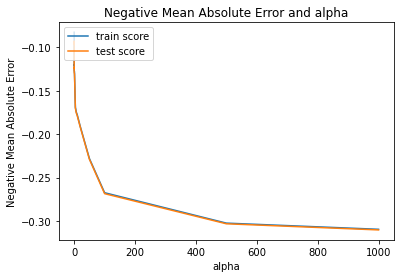

In [88]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show

In [89]:
#Fitting the best alpha

alpha = 0.001
lasso1 = Lasso(alpha=alpha)

lasso1.fit(X_train, y_train)

Lasso(alpha=0.001)

In [90]:
#Predicting X_train and converting back to the original format

lasso_result_train = pd.DataFrame({'y_train':[np.exp(y) for y in y_train],'y_train_pred':[np.exp(y) for y in lasso1.predict(X_train)]})
lasso_result_train

,y_train,y_train_pred
0,98000.0,88429.495901
1,260000.0,307545.436243
2,113000.0,119782.012981
3,117000.0,131872.388081
4,122500.0,122556.410438
...,...,...
1017,189000.0,200518.947947
1018,385000.0,316689.454058
1019,318061.0,272083.585076
1020,110000.0,111001.091036


In [91]:
#Checking the r2 score

r2_score(lasso_result_train['y_train'],lasso_result_train['y_train_pred'])

0.833295137126661

In [92]:
#Lets check the mean absolute error

mean_absolute_error(lasso_result_train['y_train'],lasso_result_train['y_train_pred'])

15984.325476102156

In [93]:
#Creating the dataframe with the column names and the coefficients obtained

lasso1_coefficients = pd.DataFrame({'columns':X_train.columns,'coefficient':lasso1.coef_})
lasso1_coefficients

,columns,coefficient
0,MSSubClass,-0.000591
1,LotFrontage,-0.000457
2,LotArea,0.000002
3,OverallQual,0.068705
4,OverallCond,0.033133
5,MasVnrArea,-0.000011
6,ExterCond,-0.000000
7,BsmtCond,0.005160
8,BsmtExposure,0.022459
9,BsmtFinType1,0.016926


In [94]:
#finding the top predictors.(including bottom)

lasso1_coefficients.sort_values(by=['coefficient'],ascending=False)

,columns,coefficient
46,Neighborhood_Crawfor,0.111264
51,Neighborhood_NridgHt,0.090396
55,Neighborhood_Somerst,0.089472
3,OverallQual,0.068705
57,Condition1_Norm,0.060740
32,MSZoning_RL,0.058358
106,SaleCondition_Partial,0.042568
20,Fireplaces,0.037321
41,LotConfig_CulDSac,0.035373
4,OverallCond,0.033133


In [95]:
#Lets check the no. of columns that have been reduced to 0

len(lasso1_coefficients[lasso1_coefficients['coefficient'] == 0])

50

If we double the value of alpha ie. 0.002

In [96]:
alpha = 0.002
lasso2 = Lasso(alpha=alpha)

lasso2.fit(X_train, y_train)

Lasso(alpha=0.002)

In [97]:
lasso_result_train_double = pd.DataFrame({'y_train':[np.exp(y) for y in y_train],'y_train_pred':[np.exp(y) for y in lasso2.predict(X_train)]})
lasso_result_train_double

,y_train,y_train_pred
0,98000.0,90335.053639
1,260000.0,307511.800997
2,113000.0,117380.673483
3,117000.0,131478.076348
4,122500.0,115216.039031
...,...,...
1017,189000.0,204837.676187
1018,385000.0,329907.044990
1019,318061.0,265204.881554
1020,110000.0,109298.749181


In [98]:
#The mean absolute error also increases with increase in alpha

mean_absolute_error(lasso_result_train_double['y_train'],lasso_result_train_double['y_train_pred'])

16564.19958122514

In [99]:
lasso2_coefficients = pd.DataFrame({'columns':X_train.columns,'coefficient':lasso2.coef_})
lasso2_coefficients

,columns,coefficient
0,MSSubClass,-0.000700
1,LotFrontage,-0.000435
2,LotArea,0.000002
3,OverallQual,0.072754
4,OverallCond,0.034872
5,MasVnrArea,-0.000004
6,ExterCond,-0.000000
7,BsmtCond,0.003846
8,BsmtExposure,0.018843
9,BsmtFinType1,0.017745


In [100]:
#We observe more coefficients have been reduced to 0 with increase of alpha

len(lasso2_coefficients[lasso2_coefficients['coefficient'] == 0])

62

In [101]:
#Predicting X_test and converting back to the original format

lasso_result_test = pd.DataFrame({'y_test':[np.exp(y) for y in y_test],'y_test_pred':[np.exp(y) for y in lasso1.predict(X_test)]})
lasso_result_test

,y_test,y_test_pred
0,120500.0,122323.683233
1,196500.0,189137.446472
2,176000.0,176255.741528
3,213500.0,209188.244642
4,171000.0,110610.968098
5,222000.0,283509.241046
6,231500.0,228798.893089
7,268000.0,293088.139004
8,107500.0,117658.281107
9,180000.0,174611.691229


In [102]:
#We see same results for lasso too, low difference hence model is stable

r2_score(lasso_result_test['y_test'],lasso_result_test['y_test_pred'])

0.8744877383027606

In [103]:
#Lets map the coefficients with column names

lasso_coefficients = pd.DataFrame({'columns':X_train.columns,'coefficient':lasso1.coef_})
lasso_coefficients

,columns,coefficient
0,MSSubClass,-0.000591
1,LotFrontage,-0.000457
2,LotArea,0.000002
3,OverallQual,0.068705
4,OverallCond,0.033133
5,MasVnrArea,-0.000011
6,ExterCond,-0.000000
7,BsmtCond,0.005160
8,BsmtExposure,0.022459
9,BsmtFinType1,0.016926


In [104]:
#Following columns have been assigned with 0 coefficient by lasso regression

lasso_coefficients[lasso_coefficients['coefficient'] == 0]

,columns,coefficient
6,ExterCond,-0.0
10,BsmtFinType2,0.0
16,BsmtHalfBath,-0.0
19,KitchenAbvGr,0.0
33,MSZoning_RM,-0.0
35,LotShape_IR2,0.0
37,LotShape_Reg,0.0
38,LandContour_HLS,0.0
42,LotConfig_FR2,-0.0
43,LotConfig_FR3,-0.0


For Question 3, We have to remove the top 5 features identified from the lasso model since its not present in the incoming data. The top 5 predictors identified were:-
1.Neighborhood_Crawfor
2.Neighborhood_NridgHt
3.Neighborhood_Somerst
4.Neighborhood_Edwards
5.OverallQual

In [105]:
#Dropping the top 5 predictors of previous lasso model

X_train_new = X_train.drop(['Neighborhood_Crawfor','Neighborhood_NridgHt','Neighborhood_Somerst','Neighborhood_Edwards','OverallQual'],axis=1)
X_test_new = X_test.drop(['Neighborhood_Crawfor','Neighborhood_NridgHt','Neighborhood_Somerst','Neighborhood_Edwards','OverallQual'],axis=1)

In [106]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
model_cv.best_estimator_

Lasso(alpha=0.001)

In [108]:
alpha = 0.001
lasso_new = Lasso(alpha=alpha)

lasso_new.fit(X_train_new, y_train)

Lasso(alpha=0.001)

In [109]:
lasso_result_train_new = pd.DataFrame({'y_train':[np.exp(y) for y in y_train],'y_train_pred':[np.exp(y) for y in lasso_new.predict(X_train_new)]})
lasso_result_train_new

,y_train,y_train_pred
0,98000.0,86420.094707
1,260000.0,333524.373688
2,113000.0,114776.546521
3,117000.0,122068.372331
4,122500.0,135361.180988
...,...,...
1017,189000.0,198520.271884
1018,385000.0,270251.369715
1019,318061.0,249237.245155
1020,110000.0,114250.671328


In [110]:
#Error has increased since the top predictors have been removed. Not a significant increase though.

mean_absolute_error(lasso_result_train_new['y_train'],lasso_result_train_new['y_train_pred'])

18271.299608660076

In [111]:
#The R2 has decreased significantly for the train data

r2_score(lasso_result_train_new['y_train'],lasso_result_train_new['y_train_pred'])

0.7513645591143058

In [112]:
lasso_result_test_new = pd.DataFrame({'y_test':[np.exp(y) for y in y_test],'y_test_pred':[np.exp(y) for y in lasso_new.predict(X_test_new)]})
lasso_result_test_new

,y_test,y_test_pred
0,120500.0,134374.796280
1,196500.0,186219.476674
2,176000.0,169455.181508
3,213500.0,209768.000938
4,171000.0,102517.351614
5,222000.0,275830.630778
6,231500.0,234279.478799
7,268000.0,286217.876528
8,107500.0,111006.878017
9,180000.0,174917.886858


In [113]:
#Not much of significant increase in absolute error

mean_absolute_error(lasso_result_test_new['y_test'],lasso_result_test_new['y_test_pred'])

19487.25303652231

In [114]:
#The test r2 shows a high r2 signifying the left out variables are good enough to provide a high predictive power

r2_score(lasso_result_test_new['y_test'],lasso_result_test_new['y_test_pred'])

0.8497469796796985

In [115]:
lasso_new_coefficients = pd.DataFrame({'columns':X_train_new.columns,'coefficient':lasso_new.coef_})
lasso_new_coefficients

,columns,coefficient
0,MSSubClass,-0.000619
1,LotFrontage,-0.000611
2,LotArea,0.000002
3,OverallCond,0.042303
4,MasVnrArea,0.000024
5,ExterCond,-0.008081
6,BsmtCond,0.022982
7,BsmtExposure,0.025633
8,BsmtFinType1,0.018199
9,BsmtFinType2,-0.000092


In [116]:
#The top predictors.(Including the bottom)

lasso_new_coefficients.sort_values(by=['coefficient'],ascending=False)

,columns,coefficient
52,Condition1_Norm,0.069117
19,Fireplaces,0.068651
101,SaleCondition_Partial,0.057911
3,OverallCond,0.042303
84,Foundation_PConc,0.033065
40,LotConfig_CulDSac,0.032159
100,SaleCondition_Normal,0.027491
7,BsmtExposure,0.025633
65,RoofStyle_Hip,0.025505
6,BsmtCond,0.022982
